# Correlation and Regression in R
 
> describe relationships between two numerical quantities and characterize these relationships graphically.

- author: Victor Omondi
- toc: true
- comments: true
- categories: [correlation, regression]
- image: images/corr-reg-shield.png

# Overview

Ultimately, data analysis is about understanding relationships among variables. Exploring data with multiple variables requires new, more complex tools, but enables a richer set of comparisons. We will describe relationships between two numerical quantities. We will characterize these relationships graphically, in the form of summary statistics, and through simple linear regression models.


# Libraries

In [109]:
library(ggplot2)
library(openintro)
library(dplyr)
library(tidyr)
library(readr)
library(broom)

Warning message:
"package 'broom' was built under R version 3.6.3"

# Visualizing two variables

The techniques for exploring bivariate relationships.

## Visualizing bivariate relationships

> ### Bivariate  relationships
- Both variables are numerical 
- Response variable 
  - a.k.a. y, dependent
- Explanatory variable 
  - Something you think might be related to the response 
  - a.k.a. x, independent, predictor

> ### Graphical representations
- Put response on vertical axis 
- Put explanatory on horizontal axis


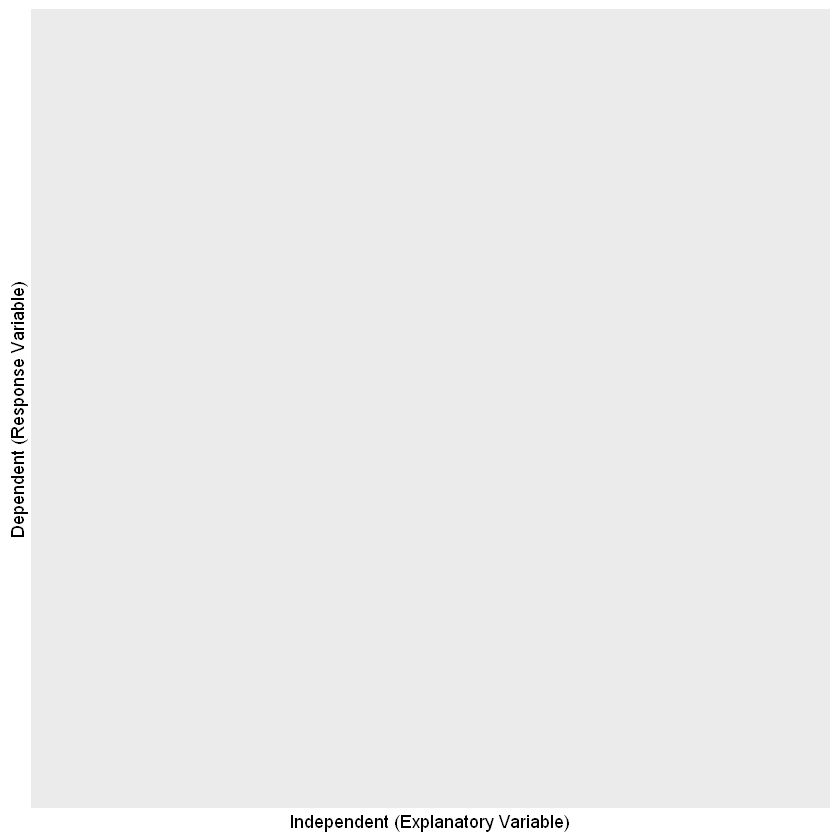

In [2]:
ggplot()+
    geom_line()+
    xlab("Independent (Explanatory Variable)") +
    ylab("Dependent (Response Variable)")

In [3]:
head(possum)

site,pop,sex,age,head_l,skull_w,total_l,tail_l
1,Vic,m,8,94.1,60.4,89.0,36.0
1,Vic,f,6,92.5,57.6,91.5,36.5
1,Vic,f,6,94.0,60.0,95.5,39.0
1,Vic,f,6,93.2,57.1,92.0,38.0
1,Vic,f,2,91.5,56.3,85.5,36.0
1,Vic,f,1,93.1,54.8,90.5,35.5


### Scatterplot

Scatterplots are the most common and effective tools for visualizing the relationship between two numeric variables.

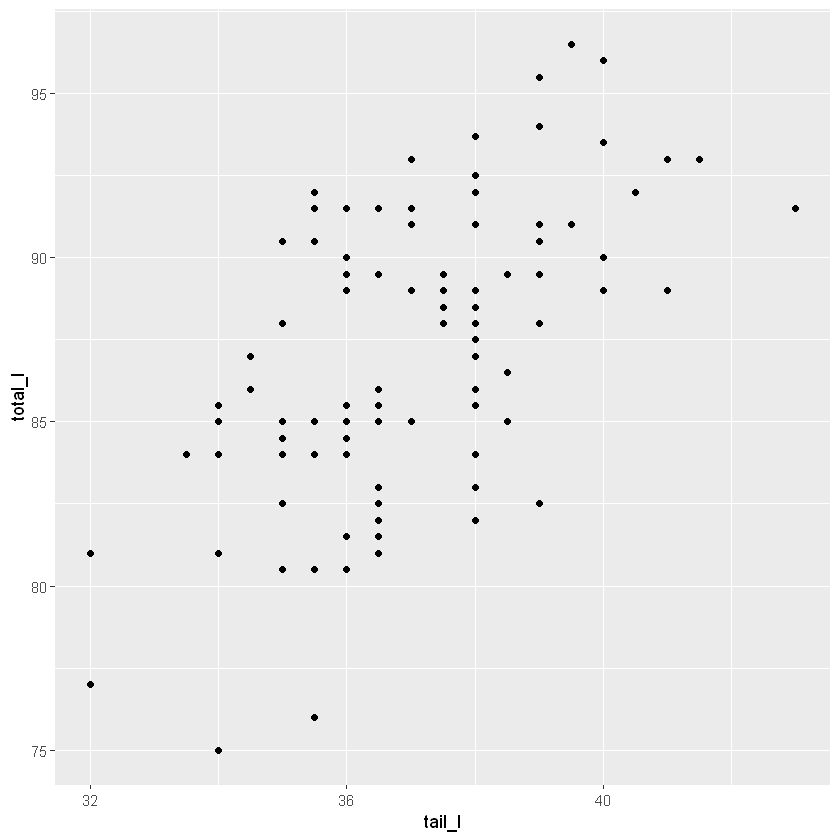

In [4]:
possum %>%
    ggplot(aes(x=tail_l, y=total_l)) +
    geom_point()

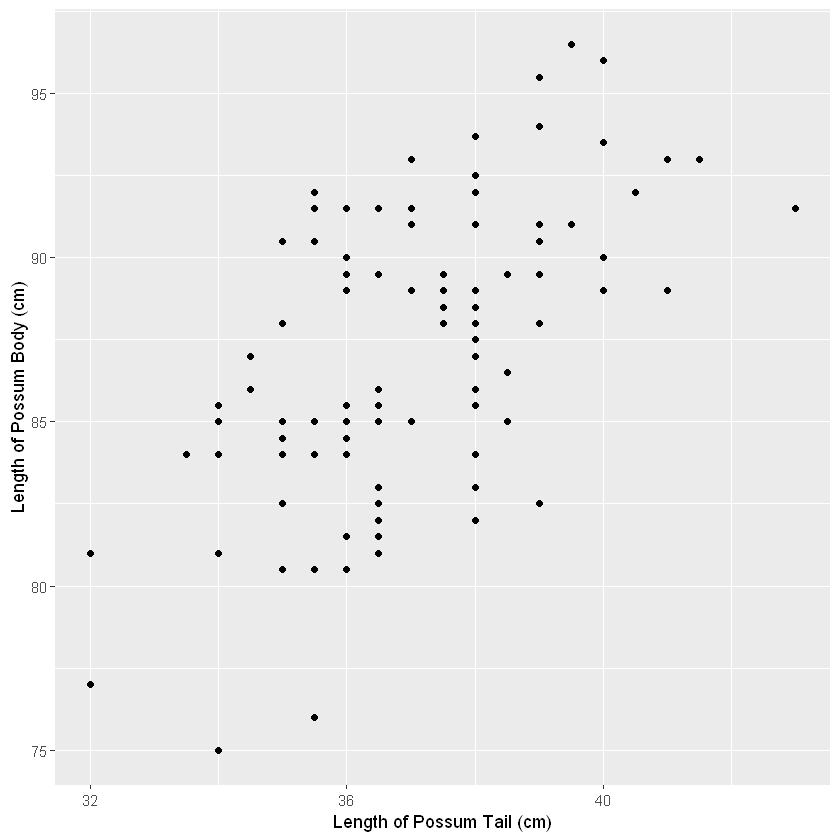

In [5]:
possum %>%
    ggplot(aes(x=tail_l, y=total_l)) +
    geom_point() +
    scale_x_continuous("Length of Possum Tail (cm)") +
    scale_y_continuous("Length of Possum Body (cm)")

- Can think of boxplots as scatterplots......
  - but with discretized explanatory variable
- `cut()` function discretizes 
  - Choose appropriate number of "boxes"

The `cut()` function takes two arguments: the continuous variable you want to discretize and the number of `breaks` that you want to make in that continuous variable in order to discretize it.

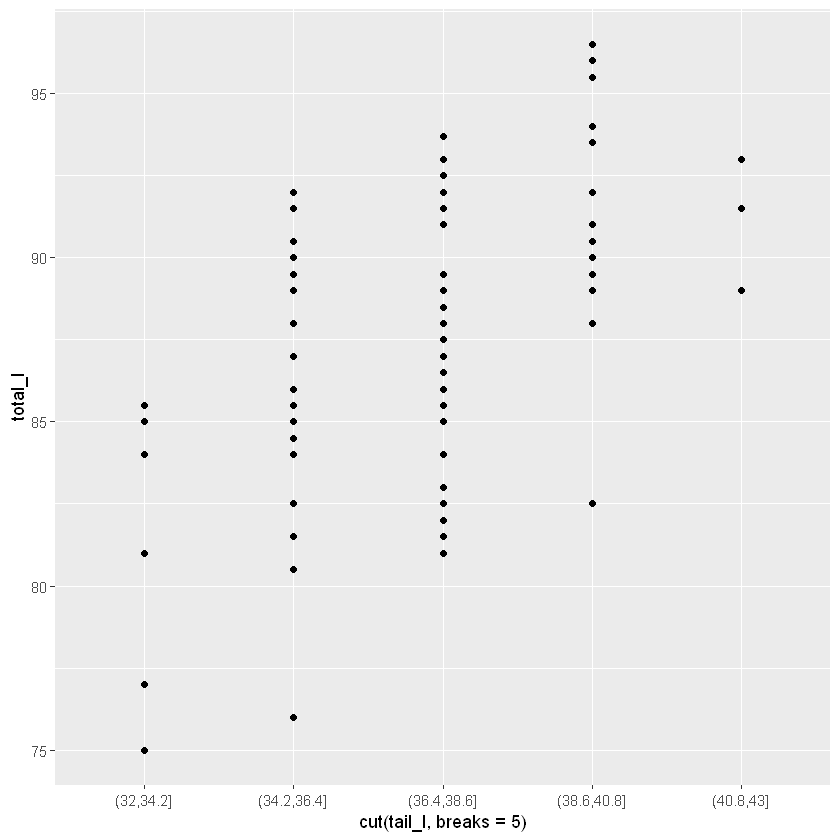

In [6]:
possum %>%
    ggplot(aes(x=cut(tail_l, breaks=5), y=total_l)) +
    geom_point()

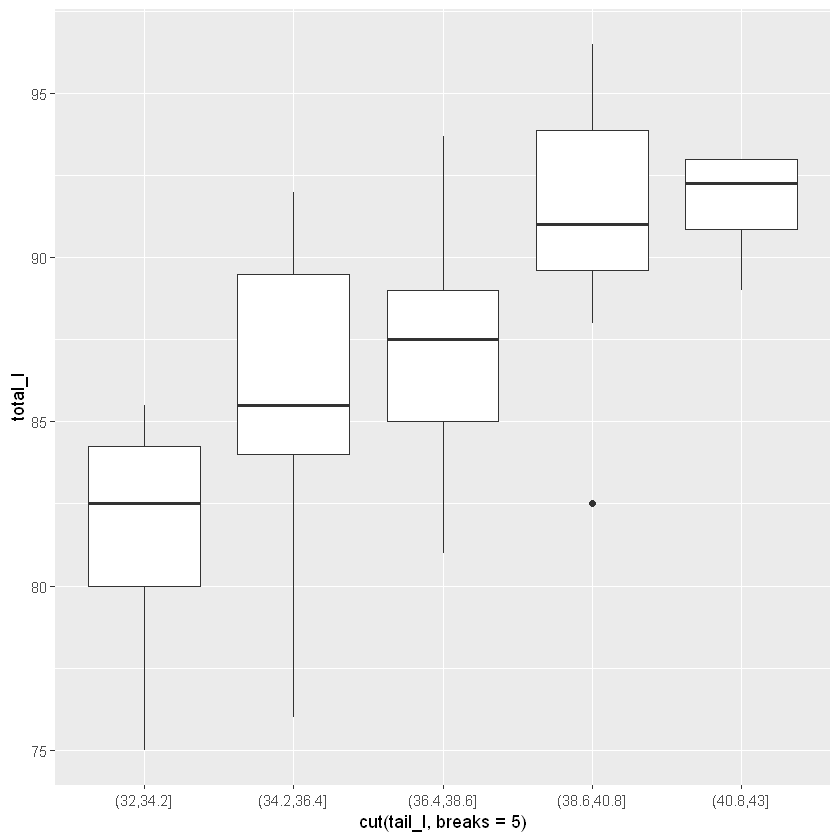

In [7]:
possum %>%
    ggplot(aes(x=cut(tail_l, breaks=5), y=total_l)) +
    geom_boxplot()

### ncbirths

In [8]:
head(ncbirths)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
NA,13,younger mom,39,full term,10,not married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,not married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,not married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,not married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,not married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,not married,22,5.38,low,male,nonsmoker,not white


The `ncbirths` dataset is a random sample of 1,000 cases taken from a larger dataset collected in 2004. Each case describes the birth of a single child born in North Carolina, along with various characteristics of the child (e.g. birth weight, length of gestation, etc.), the child's mother (e.g. age, weight gained during pregnancy, smoking habits, etc.) and the child's father (e.g. age).

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

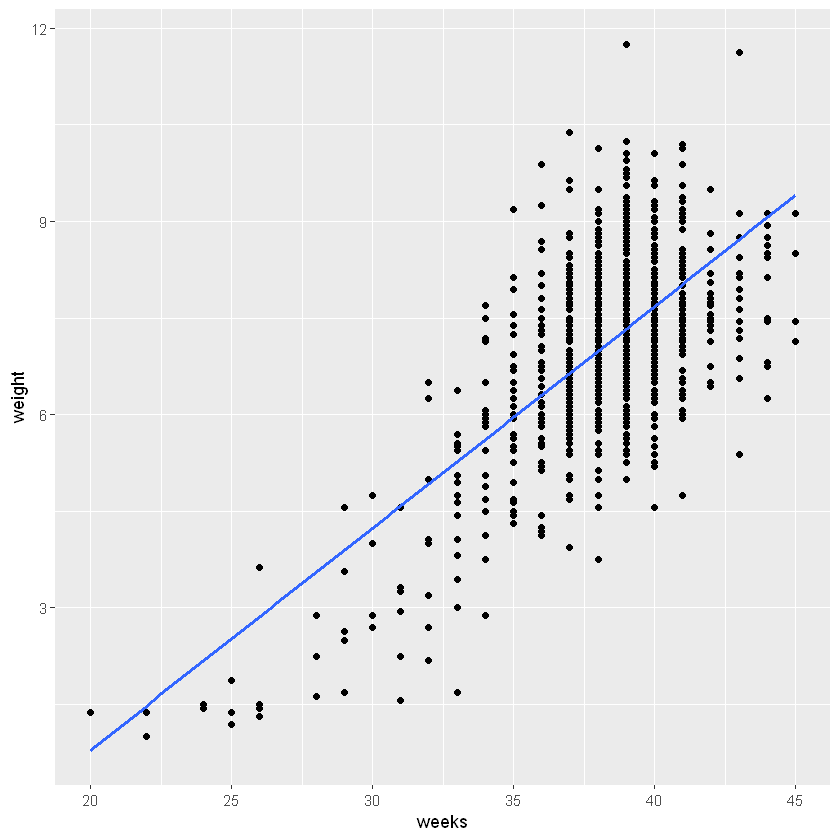

In [9]:
ncbirths %>%
    ggplot(aes(x=weeks, y=weight)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### Boxplots as discretized/conditioned scatterplots

We you can think of boxplots as scatterplots for which the variable on the x-axis has been discretized.

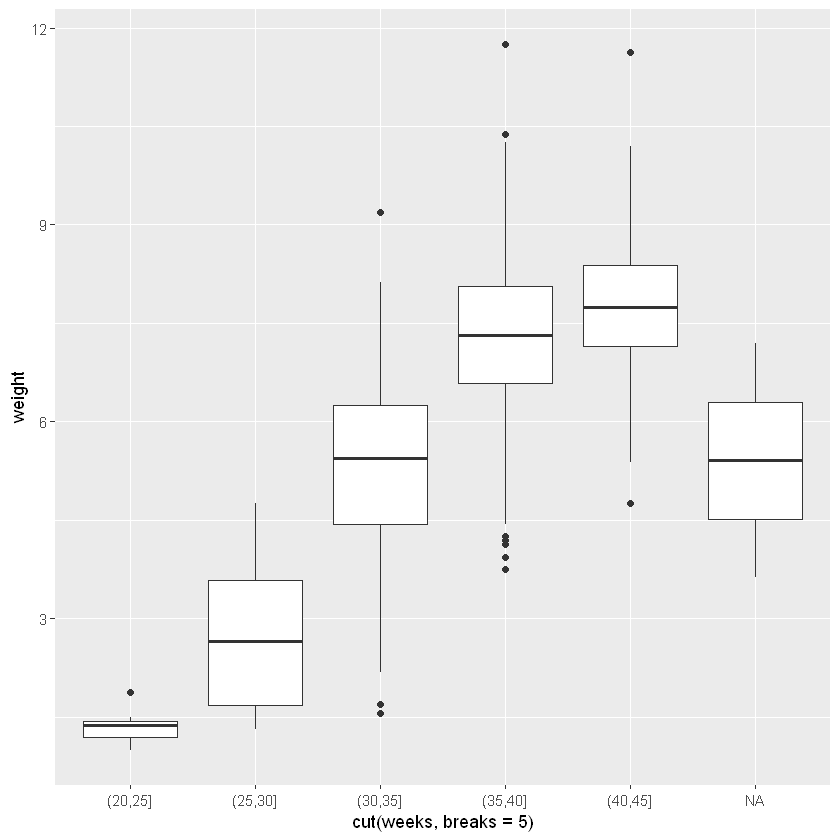

In [10]:
ncbirths %>%
    ggplot(aes(x=cut(weeks, breaks=5), y=weight)) +
    geom_boxplot()

## Characterizing bivariate relationships
- Form(e.g.linear,quadratic,non-linear)
- Direction(e.g.postive,negative)
- Strength(how much scatter/noise?)
- Outliers


### Creating scatterplots

we will be using several datasets listed below. These data are available through the `openintro` package. Briefly:
- The `mammals` dataset contains information about 39 different species of mammals, including their body weight, brain weight, gestation time, and a few other variables.
- The `mlbBat10` dataset contains batting statistics for 1,199 Major League Baseball players during the 2010 season.
- The `bdims` dataset contains body girth and skeletal diameter measurements for 507 physically active individuals.
- The `smoking` dataset contains information on the smoking habits of 1,691 citizens of the United Kingdom.

In [11]:
head(mammals)

species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
Africanelephant,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
ArcticFox,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
Arcticgroundsquirrel,0.920,5.7,NA,NA,16.5,NA,25,5,2,3
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4


how the brain weight of a mammal varies as a function of its body weight.

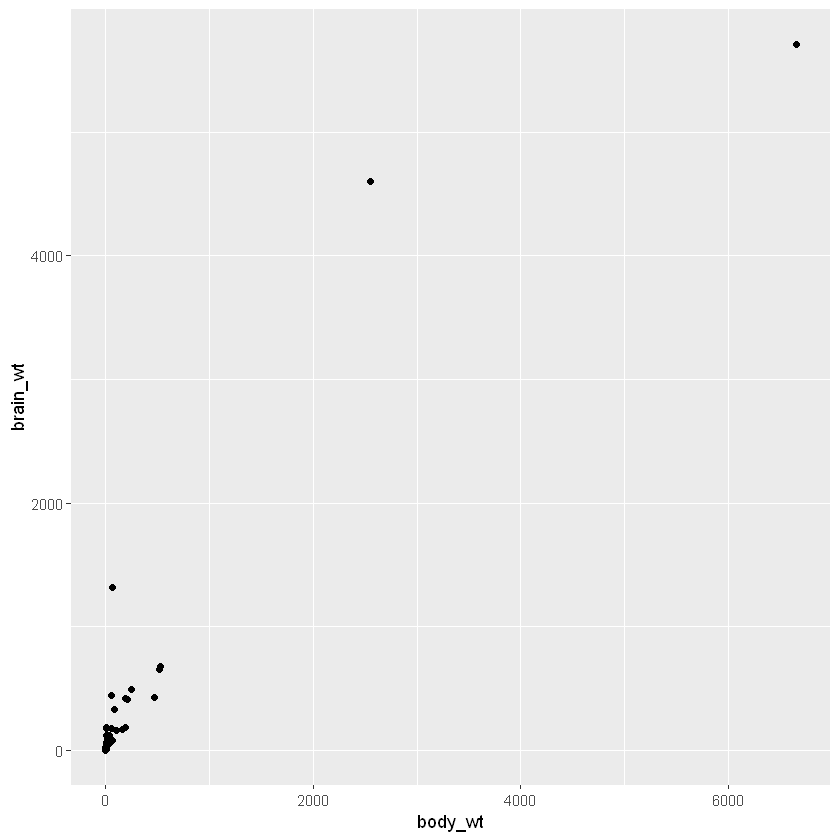

In [12]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) + 
    geom_point()

In [13]:
head(mlbbat10)

name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
M Scutaro,BOS,SS,150,632,92,174,38,0,11,56,245,53,71,5,4,0.333,0.388,0.275


how the slugging percentage (SLG) of a player varies as a function of his on-base percentage (OBP).

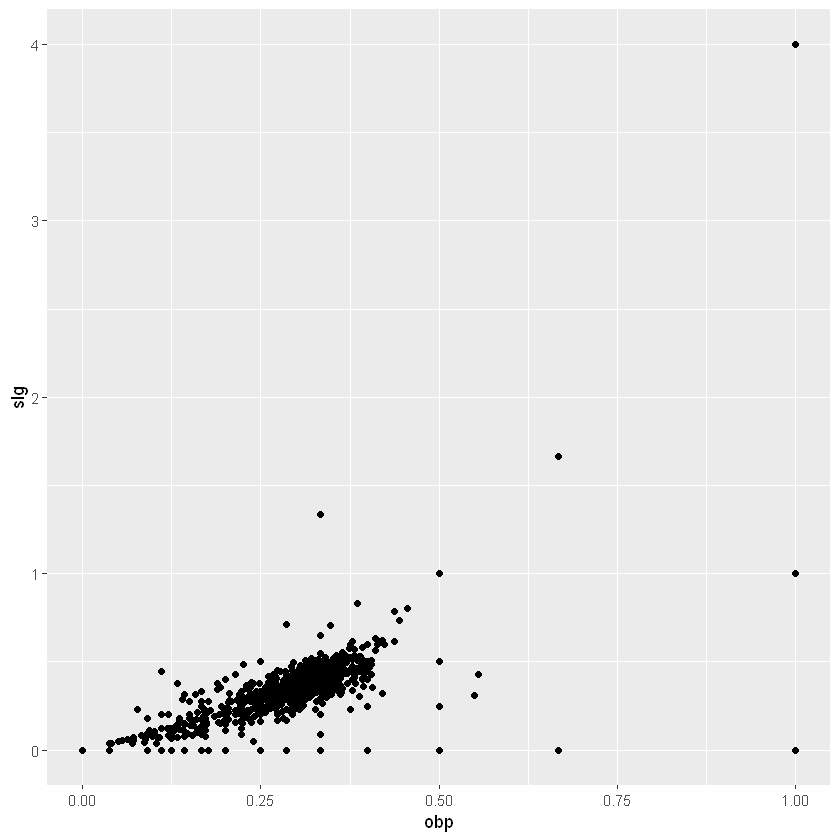

In [14]:
# Baseball player scatterplot
mlbbat10 %>%
  ggplot(aes(y=slg, x=obp)) +
  geom_point()


In [15]:
head(bdims)

bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


how a person's weight varies as a function of their height. We'll use color to separate by sex, which we'll need to coerce to a factor with `factor()`.

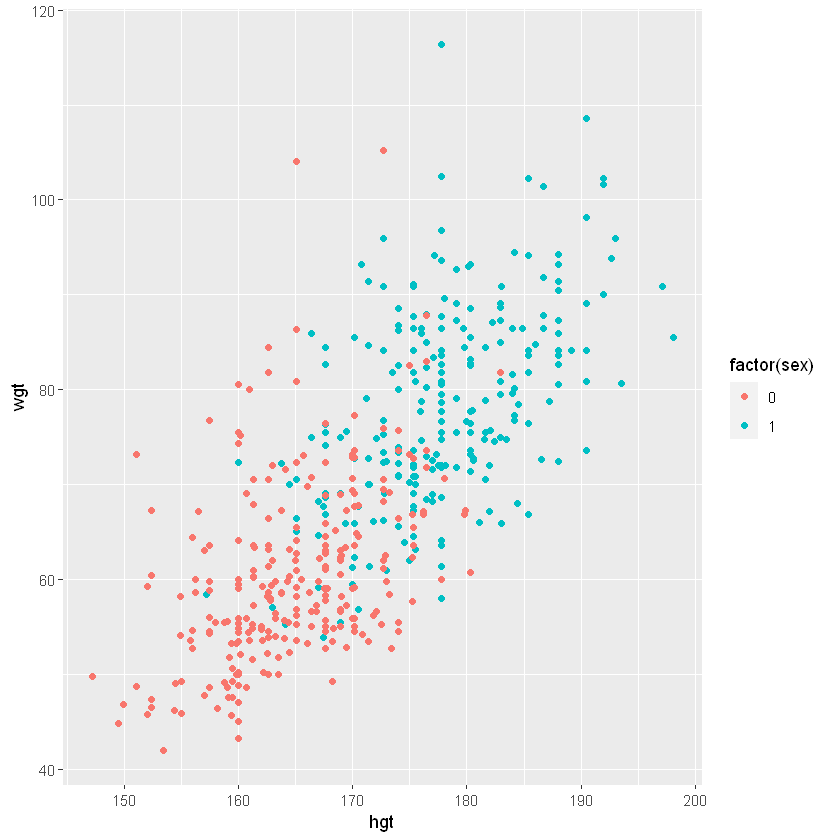

In [16]:
# Body dimensions scatterplot
bdims%>%
  ggplot(aes(x=hgt, y=wgt, color=factor(sex))) +
  geom_point()

In [17]:
head(smoking)

gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NA,NA,
Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12,12,Packets
Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NA,NA,
Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NA,NA,
Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NA,NA,
Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NA,NA,


how the amount that a person smokes on weekdays varies as a function of their age.

Warning message:
"Removed 1270 rows containing missing values (geom_point)."

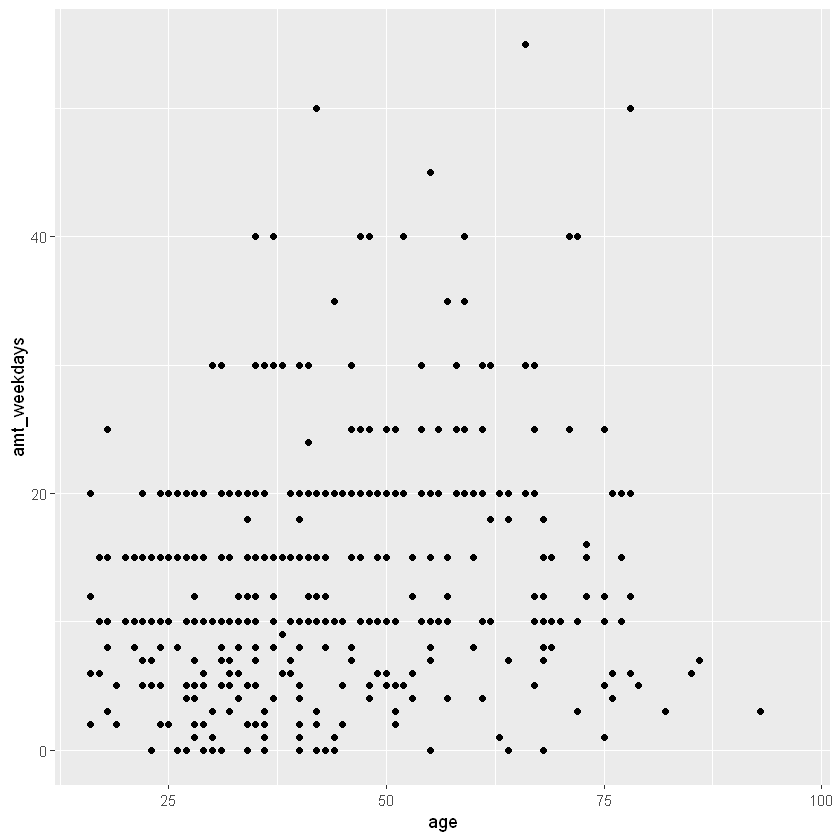

In [18]:
smoking %>%
    ggplot(aes(x=age, y=amt_weekdays)) + 
    geom_point()

In [19]:
head(county)

name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317,none
Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368,partial
Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none
Bullock County,Alabama,11714,10914,10309,-2.28,28.5,76.9,9.9,4.93,no,hs_diploma,15444.16,29655,none


In [20]:
table(county$median_edu)


    below_hs   hs_diploma some_college    bachelors 
           2         1397         1695           46 

### Transformations

The relationship between two variables may not be linear. In these cases we can sometimes see strange and even inscrutable patterns in a scatterplot of the data. Sometimes there really is no meaningful relationship between the two variables. Other times, a careful transformation of one or both of the variables can reveal a clear relationship.

`ggplot2` provides several different mechanisms for viewing transformed relationships. The `coord_trans()` function transforms the coordinates of the plot. Alternatively, the `scale_x_log10()` and `scale_y_log10()` functions perform a base-10 log transformation of each axis.

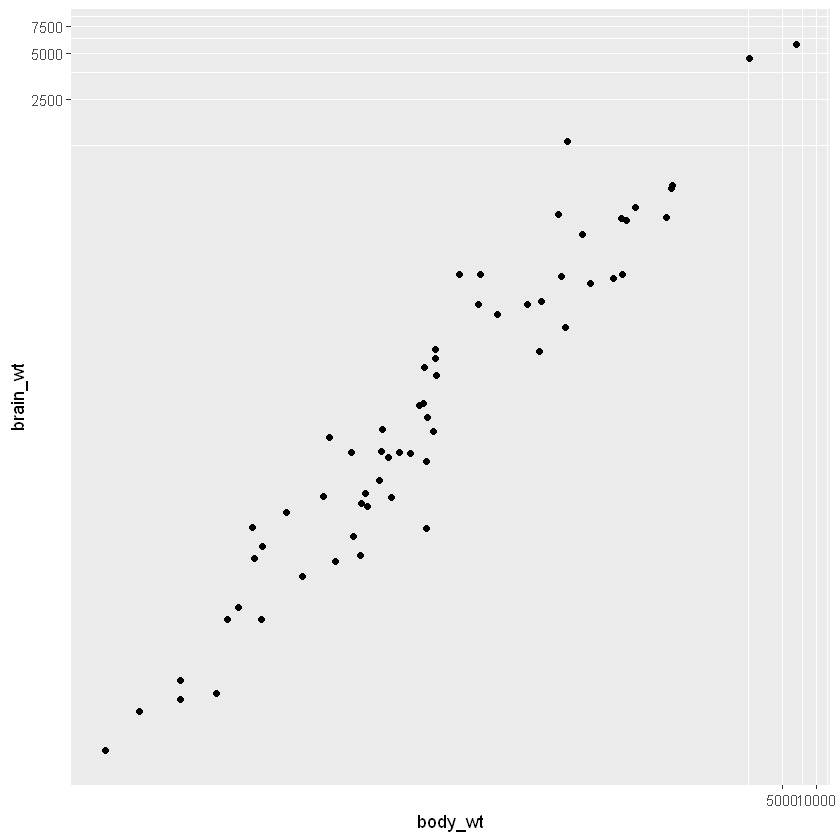

In [21]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) +
    geom_point() +
    coord_trans(x="log10", y="log10")

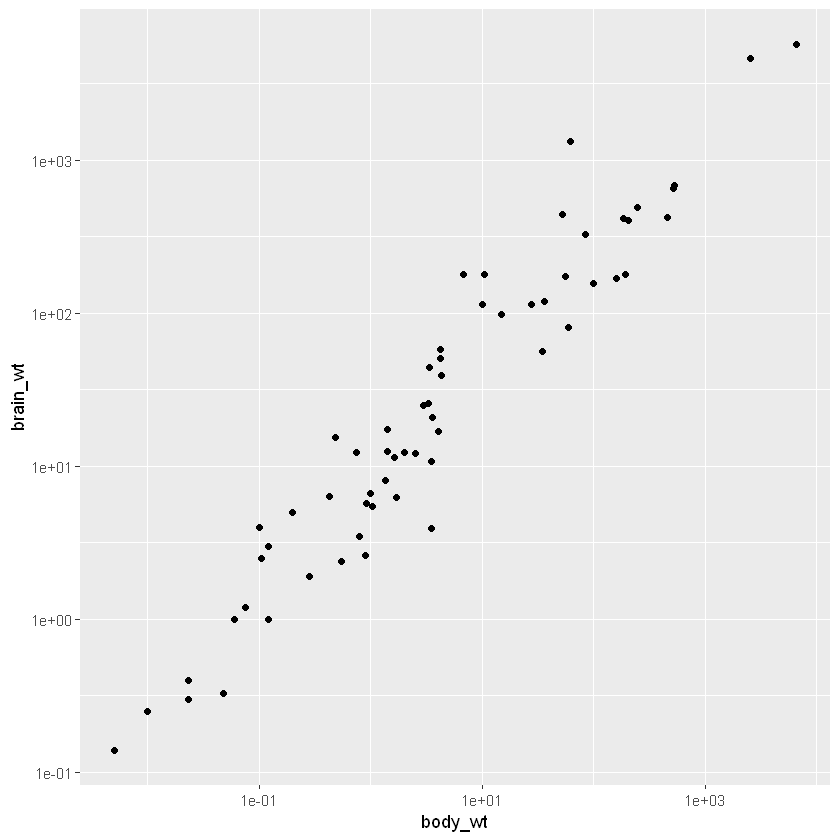

In [22]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) +
    geom_point() +
    scale_x_log10() +
    scale_y_log10()

## Outliers


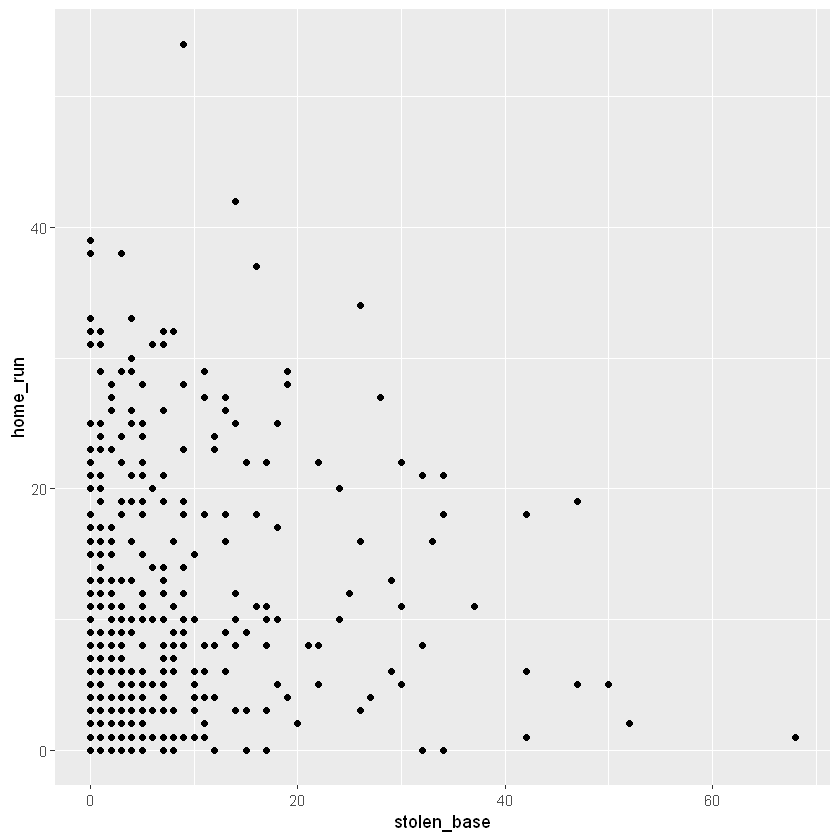

In [23]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point()

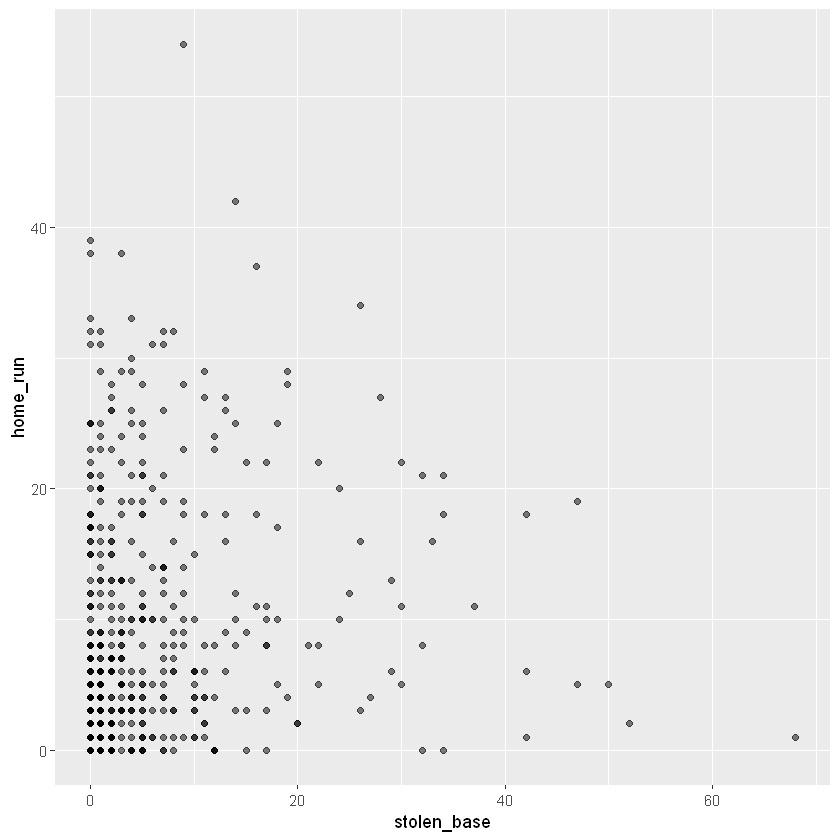

In [24]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point(alpha=.5)

> ### Add some jitter

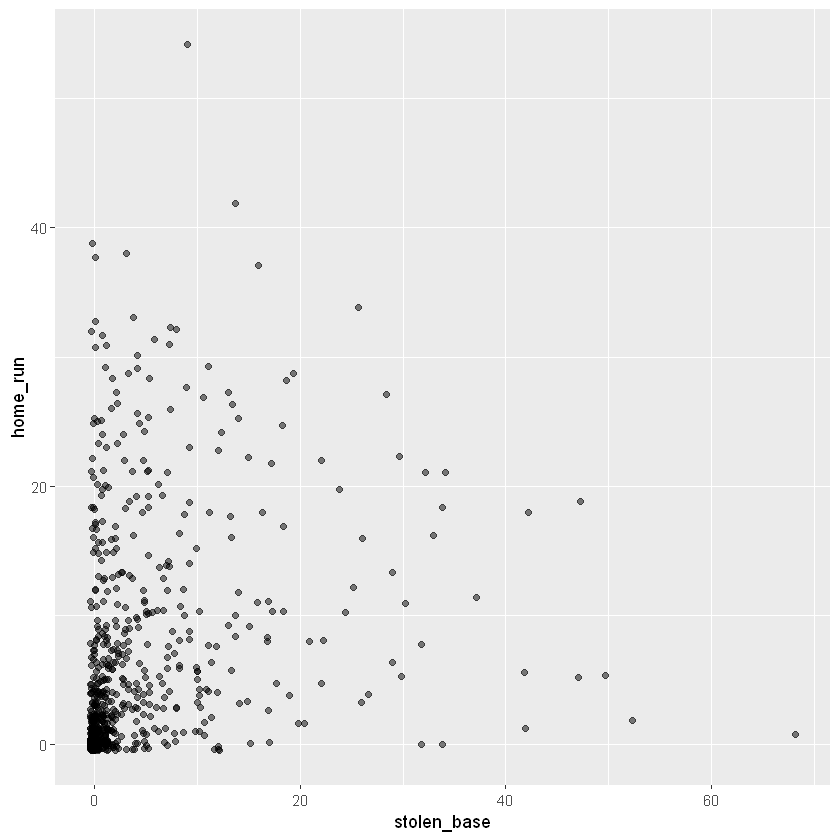

In [25]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point(alpha=.5, position="jitter")

> ### Identify the outliers

In [26]:
head(
    mlbbat10 %>%
        filter(stolen_base>60 | home_run>50) %>%
            select(name, team, position, stolen_base, home_run)
)

name,team,position,stolen_base,home_run
J Pierre,CWS,OF,68,1
J Bautista,TOR,OF,9,54


### Identifying outliers

in the baseball dataset, most of the points were clustered in the lower left corner of the plot, making it difficult to see the general pattern of the majority of the data. This difficulty was caused by a few outlying players whose on-base percentages (OBPs) were exceptionally high. These values are present in our dataset only because these players had very few batting opportunities.

Both OBP and SLG are known as _rate_ statistics, since they measure the frequency of certain events (as opposed to their count). In order to compare these rates sensibly, it makes sense to include only players with a reasonable number of opportunities, so that these observed rates have the chance to approach their long-run frequencies.

In Major League Baseball, batters qualify for the batting title only if they have 3.1 plate appearances per game. This translates into roughly 502 plate appearances in a 162-game season. The `mlbbat10` dataset does not include plate appearances as a variable, but we can use at-bats (AB) -- which constitute a subset of plate appearances -- as a proxy.

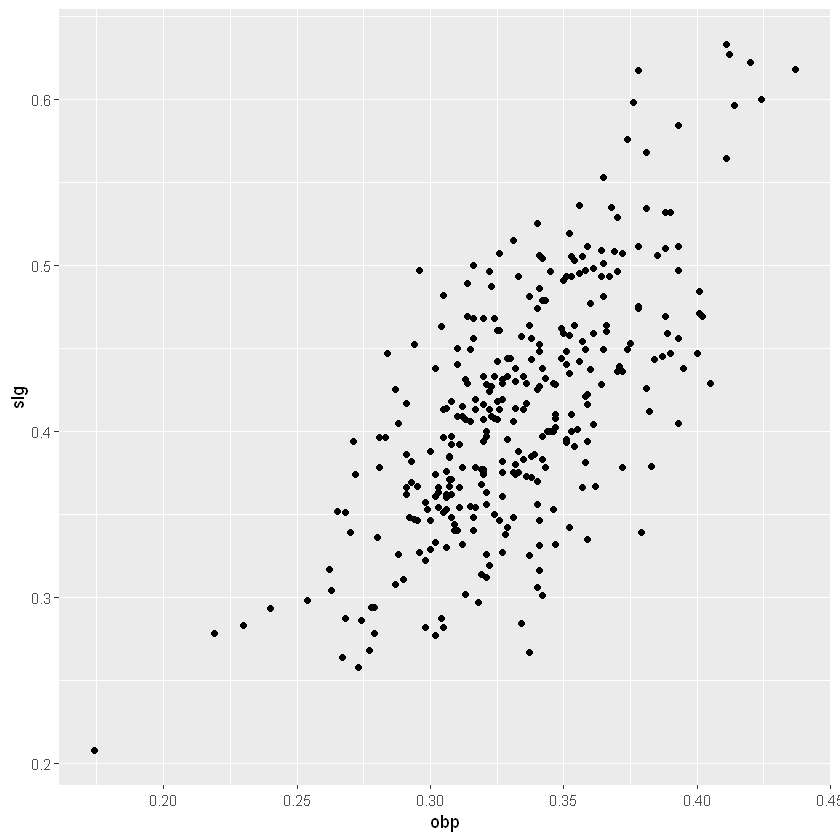

In [27]:
# Filter for AB greater than or equal to 200
ab_gt_200 <- mlbbat10 %>%
  filter(at_bat>=200) 

# Scatterplot of SLG vs. OBP
ggplot(ab_gt_200, aes(x = obp, y = slg)) +
  geom_point()

In [28]:
# Identify the outlying player
ab_gt_200 %>%
  filter(obp<.2)

name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
B Wood,LAA,3B,81,226,20,33,2,0,4,14,47,6,71,1,0,0.174,0.208,0.146


# Correlation

Correlation as a means of quantifying bivariate relationships.

### Quantifying the strength of bivariate relationships

> ### Correlation
- Correlation coefcient between -1 and 1
- Sign —> direction
- Magnitude —> strength

> ### Non-linear correlation

In [29]:
head(run09)

place,time,net_time,pace,age,gender,first,last,city,state,country,div,div_place,div_tot
1,53.533,53.533,5.367,21,F,Lineth,Chepkurui,Kenya,NR,KEN,2,1,953
2,53.917,53.917,5.400,21,F,Belianesh Zemed,Gebre,Ethiopia,NR,ETH,2,2,953
3,53.967,53.967,5.400,22,F,Teyba,Naser,Ethiopia,NR,ETH,2,3,953
4,54.433,54.433,5.450,19,F,Abebu,Gelan,Ethiopia,NR,ETH,1,1,71
5,54.450,54.450,5.450,36,F,Catherine,Ndereba,Kenya,NR,KEN,5,1,1130
6,54.533,54.533,5.467,28,F,Olga,Romanova,Russia,NR,RUS,3,1,2706


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


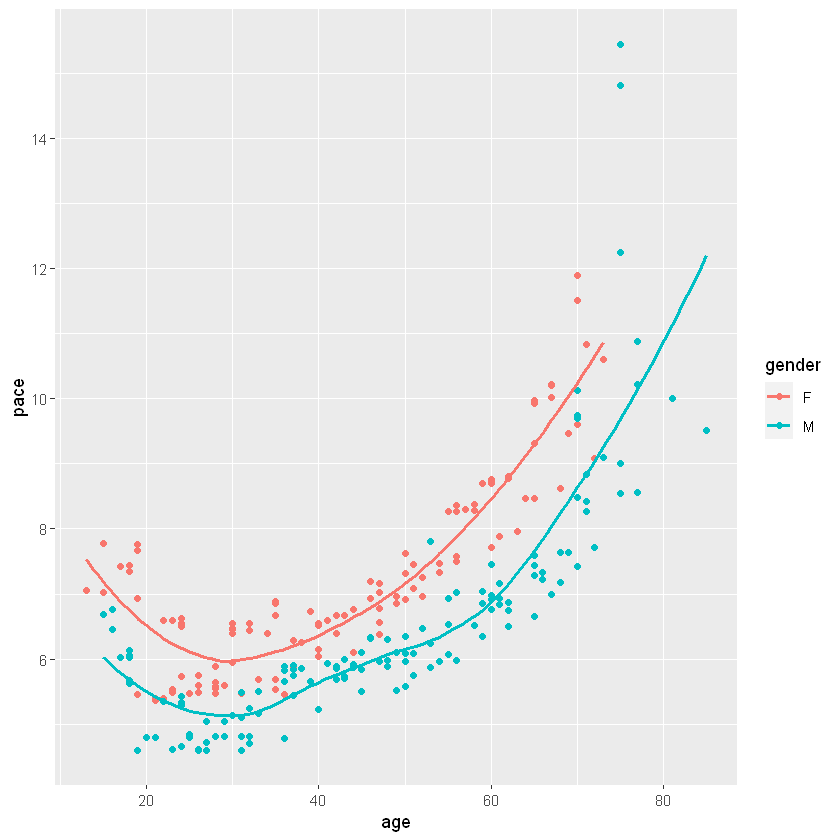

In [30]:
run09 %>%
    filter(div_place <= 10) %>%
        ggplot(aes(x=age, y=pace, color=gender)) +
        geom_point() +
        geom_smooth(se=F)

> ### Pearson product-moment correlation
$$
\begin{split}
r(x,y)&=\frac{Cov(x,y)}{\sqrt{SXX.SYY}}\\
&=\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2.(y_i - \bar{y})^2}}
\end{split}
$$
Correlation coefficients cannot be greater than 1.

### Computing correlation

The `cor(x, y)` function will compute the Pearson product-moment correlation between variables, `x` and `y`. Since this quantity is symmetric with respect to `x` and `y`, it doesn't matter in which order you put the variables.

At the same time, the `cor()` function is very conservative when it encounters missing data (e.g. NAs). The `use` argument allows you to override the default behavior of returning NA whenever any of the values encountered is NA. Setting the use argument to `"pairwise.complete.obs"` allows `cor()` to compute the correlation coefficient for those observations where the values of `x` and `y` are both not missing.

In [31]:
# Compute correlation
ncbirths %>%
  summarize(N = n(), r = cor(mage, weight))

N,r
1000,0.05506589


In [32]:
# Compute correlation for all non-missing pairs
ncbirths %>%
  summarize(N = n(), r = cor(weeks, weight, use = "pairwise.complete.obs"))

N,r
1000,0.6701013


## The Anscombe dataset

In 1973, Francis Anscombe famously created four datasets with remarkably similar numerical properties, but obviously different graphic relationships. The `anscombe` dataset contains the `x` and `y` coordinates for these four datasets, along with a grouping variable, set, that distinguishes the quartet.

In [33]:
head(anscombe)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04


In [34]:
head(anscombe2 <- anscombe %>%
    gather(x_name, x, x1:x4) %>%
        gather(y_name, y, y1:y4), 10)

x_name,x,y_name,y
x1,10,y1,8.04
x1,8,y1,6.95
x1,13,y1,7.58
x1,9,y1,8.81
x1,11,y1,8.33
x1,14,y1,9.96
x1,6,y1,7.24
x1,4,y1,4.26
x1,12,y1,10.84
x1,7,y1,4.82


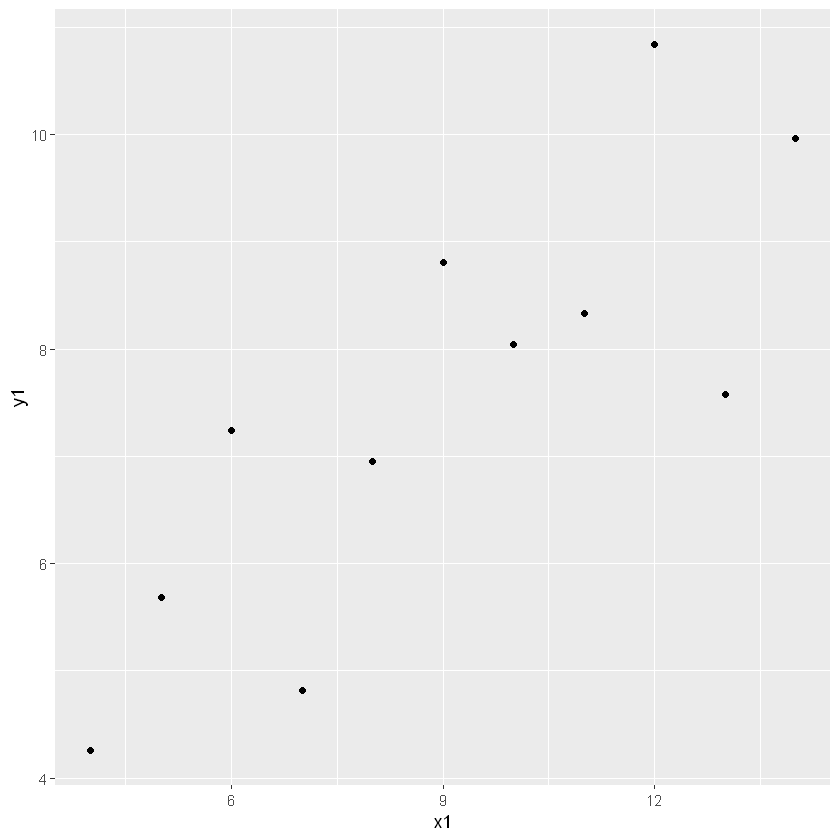

In [35]:
anscombe %>%
    ggplot(aes(x=x1,y=y1)) +
    geom_point()

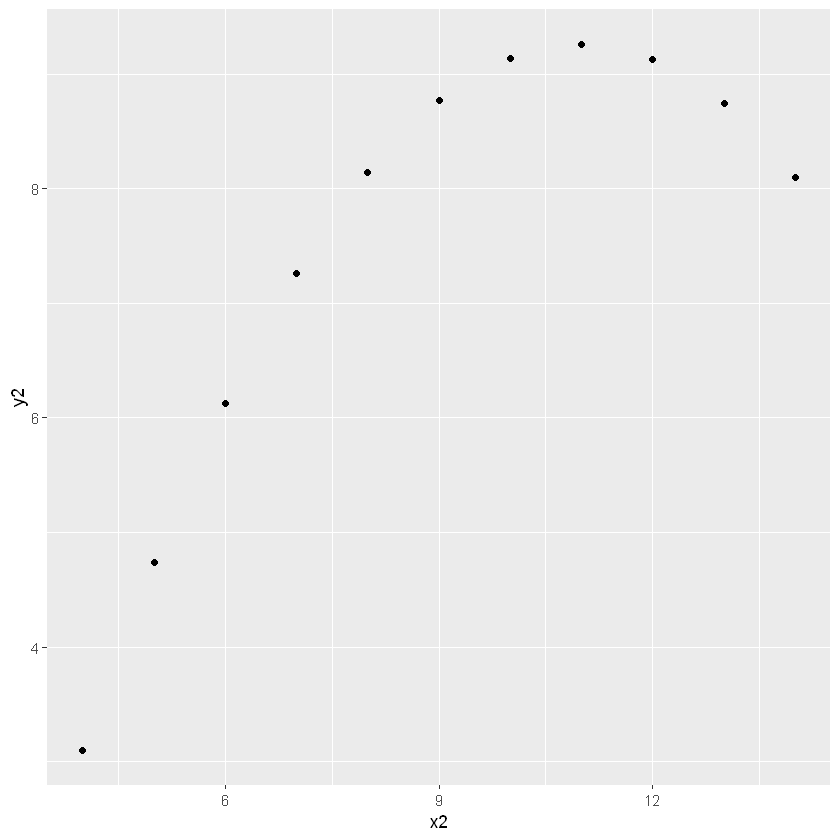

In [36]:
anscombe %>%
    ggplot(aes(x=x2,y=y2)) +
    geom_point()

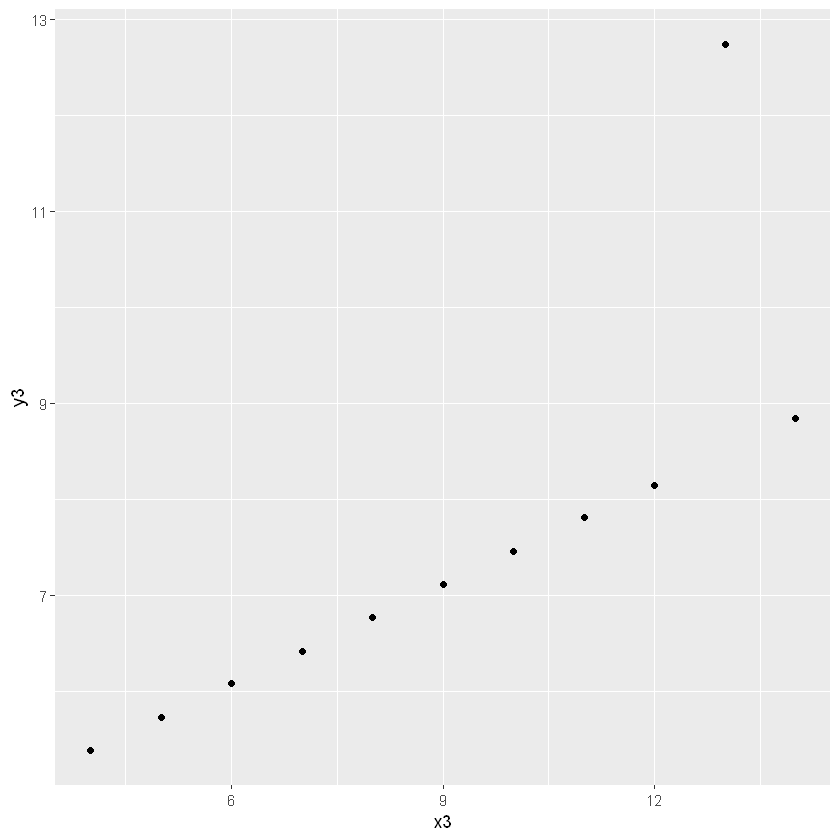

In [37]:
anscombe %>%
    ggplot(aes(x=x3,y=y3)) +
    geom_point()

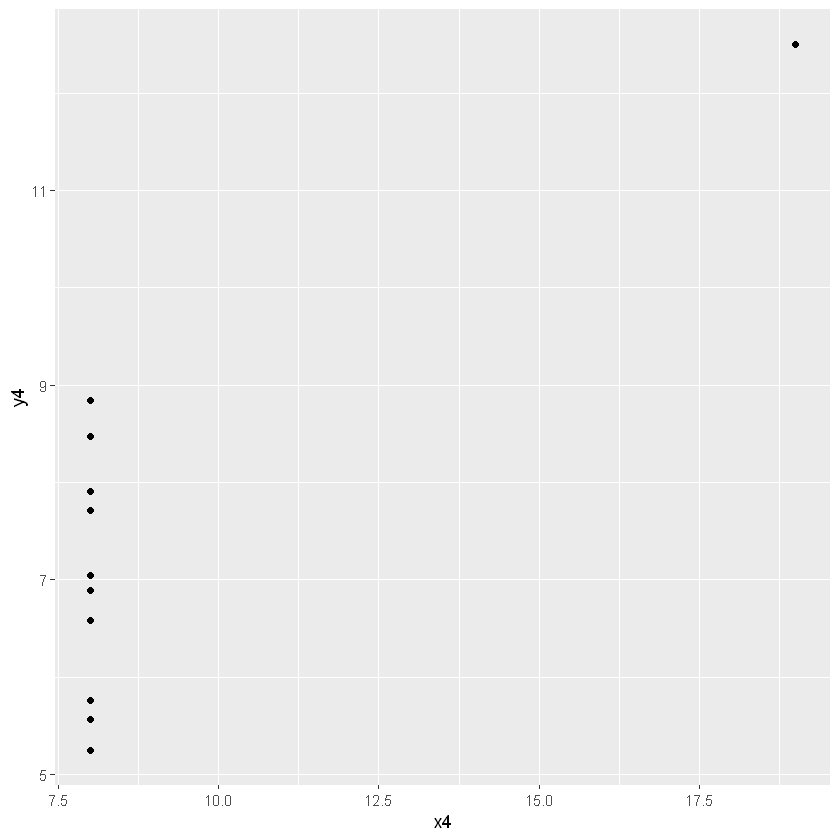

In [38]:
anscombe %>%
    ggplot(aes(x=x4,y=y4)) +
    geom_point()

In [40]:
table(anscombe2$x_name, anscombe2$y_name)

    
     y1 y2 y3 y4
  x1 11 11 11 11
  x2 11 11 11 11
  x3 11 11 11 11
  x4 11 11 11 11

In [41]:
# Compute properties of Anscombe
anscombe2 %>%
  group_by(x_name) %>%
  summarize(
    N = n(), 
    mean_of_x = mean(x), 
    std_dev_of_x = sd(x), 
    mean_of_y = mean(y), 
    std_dev_of_y = sd(y), 
    correlation_between_x_and_y = cor(x,y)
  )

`summarise()` ungrouping output (override with `.groups` argument)


x_name,N,mean_of_x,std_dev_of_x,mean_of_y,std_dev_of_y,correlation_between_x_and_y
x1,44,9,3.198837,7.500682,1.958925,0.5337908
x2,44,9,3.198837,7.500682,1.958925,0.5337908
x3,44,9,3.198837,7.500682,1.958925,0.5337908
x4,44,9,3.198837,7.500682,1.958925,-0.1940248


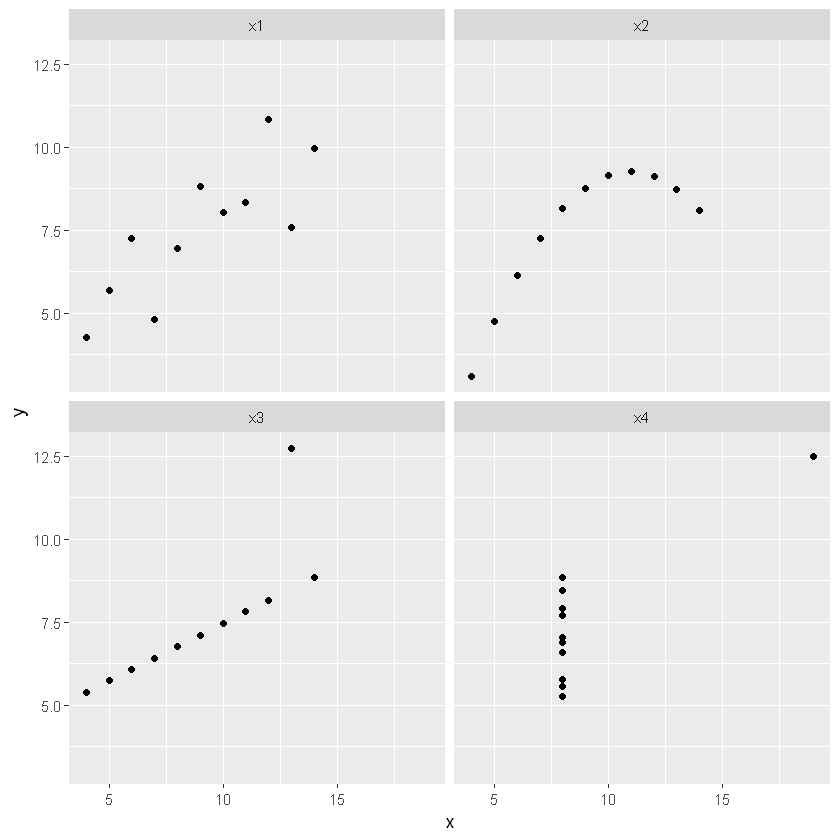

In [42]:
anscombe2 <- anscombe2 %>%
    filter((x_name=="x1"&y_name=="y1") | (x_name=="x2"&y_name=="y2") | (x_name=="x3"&y_name=="y3") | (x_name=="x4"&y_name=="y4"))
anscombe2 %>%
    ggplot(aes(x=x, y=y)) +
    geom_point() +
    facet_wrap(~x_name)

In [43]:
# Compute properties of Anscombe
anscombe2 %>%
  group_by(x_name) %>%
  summarize(
    N = n(), 
    mean_of_x = mean(x), 
    std_dev_of_x = sd(x), 
    mean_of_y = mean(y), 
    std_dev_of_y = sd(y), 
    correlation_between_x_and_y = cor(x,y)
  )

`summarise()` ungrouping output (override with `.groups` argument)


x_name,N,mean_of_x,std_dev_of_x,mean_of_y,std_dev_of_y,correlation_between_x_and_y
x1,11,9,3.316625,7.500909,2.031568,0.8164205
x2,11,9,3.316625,7.500909,2.031657,0.8162365
x3,11,9,3.316625,7.500000,2.030424,0.8162867
x4,11,9,3.316625,7.500909,2.030579,0.8165214


all of the measures are identical (ignoring rounding error) across the four different sets.

### Perception of correlation (2)

Estimating the value of the correlation coefficient between two quantities from their scatterplot can be tricky. [Statisticians have shown that](https://statistics.stanford.edu/sites/default/files/EFS%20NSF%20206.pdf) people's perception of the strength of these relationships can be influenced by design choices like the x and y scales.

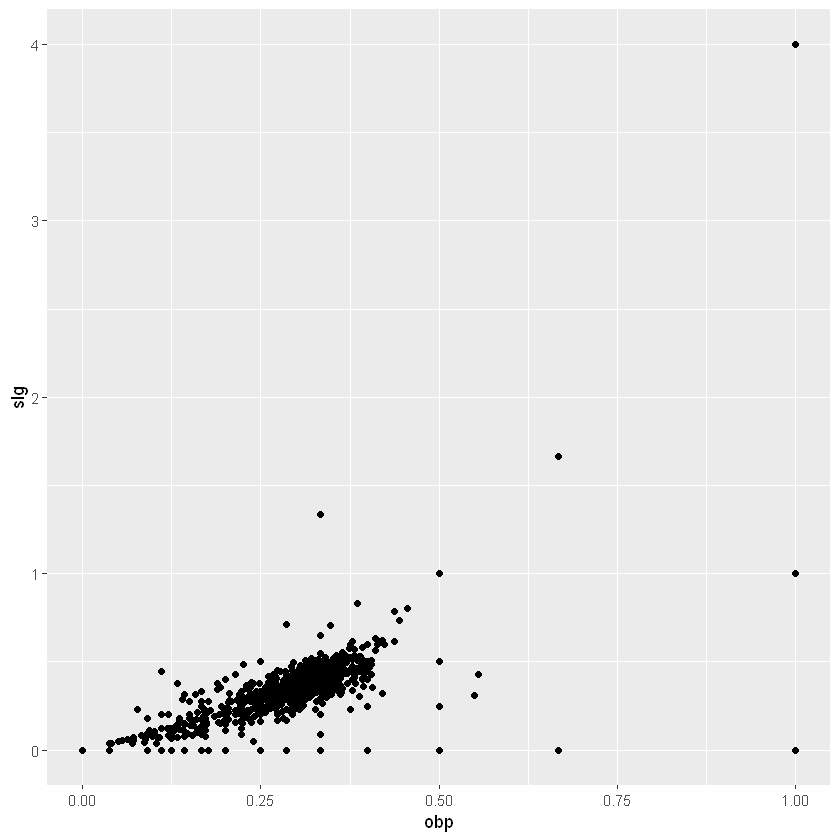

In [44]:
# Run this and look at the plot
ggplot(data = mlbbat10, aes(x = obp, y = slg)) +
  geom_point()



In [45]:
# Correlation for all baseball players
mlbbat10 %>%
  summarize(N = n(), r = cor(obp, slg))

N,r
1199,0.8145628


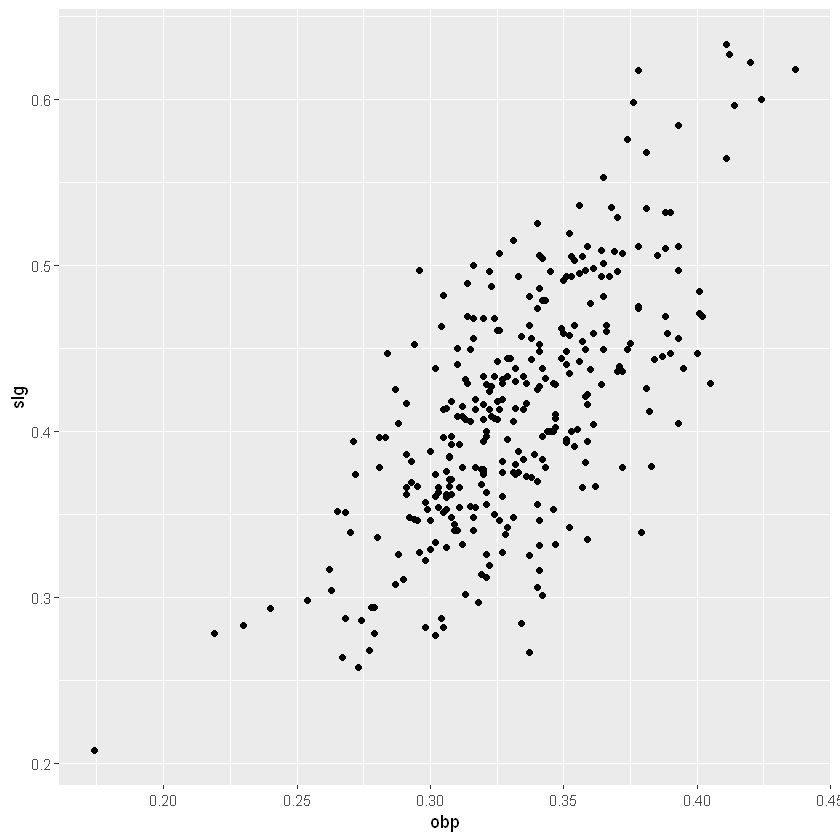

In [46]:
# Run this and look at the plot
mlbbat10 %>% 
    filter( at_bat> 200) %>%
    ggplot(aes(x = obp, y = slg)) + 
    geom_point()

In [47]:
# Correlation for all players with at least 200 ABs
mlbbat10 %>%
  filter(at_bat>=200) %>%
  summarize(N = n(), r = cor(obp, slg))

N,r
329,0.6855364


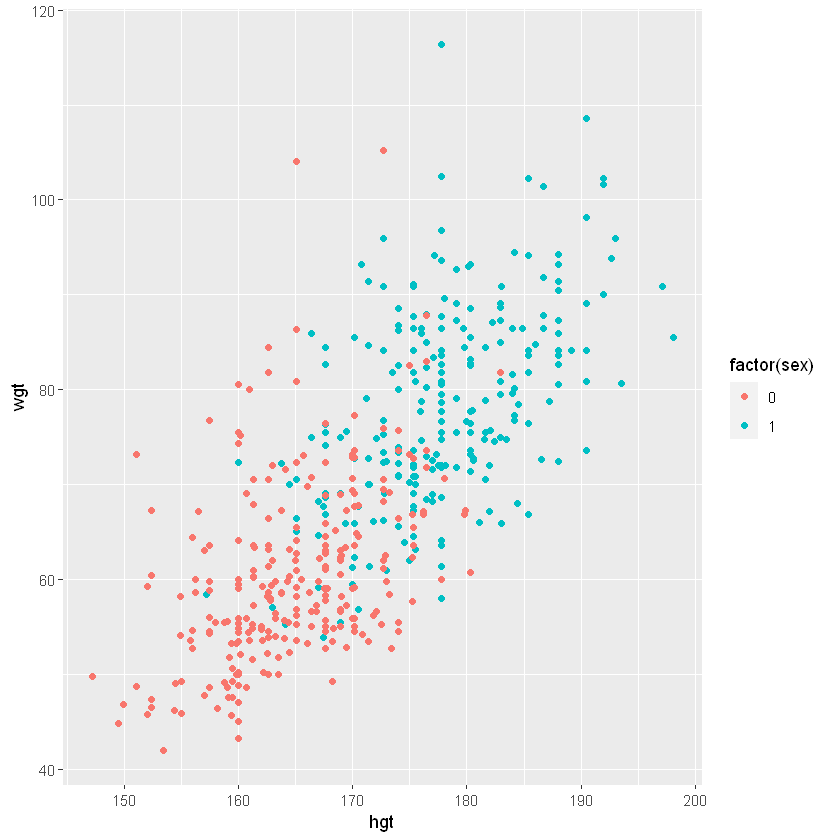

In [48]:
# Run this and look at the plot
ggplot(data = bdims, aes(x = hgt, y = wgt, color = factor(sex))) +
  geom_point() 



In [49]:
# Correlation of body dimensions
bdims %>%
  group_by(sex) %>%
  summarize(N = n(), r = cor(hgt, wgt))

`summarise()` ungrouping output (override with `.groups` argument)


sex,N,r
0,260,0.4310593
1,247,0.5347418


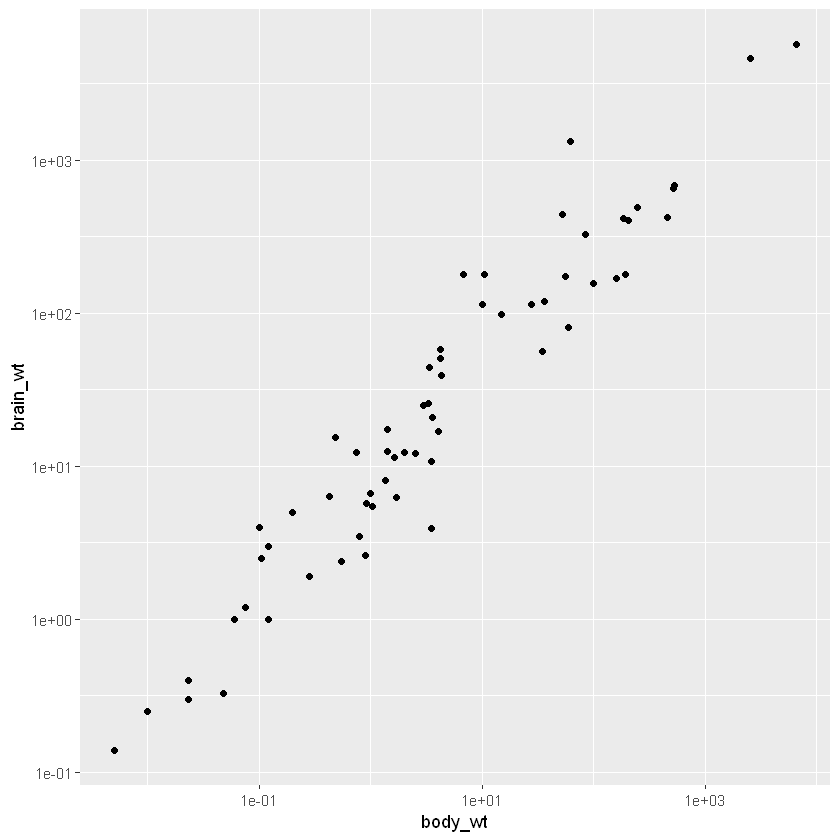

In [50]:
# Run this and look at the plot
ggplot(data = mammals, aes(x = body_wt, y = brain_wt)) +
  geom_point() + scale_x_log10() + scale_y_log10()



In [51]:
# Correlation among mammals, with and without log
mammals %>%
  summarize(N = n(), 
            r = cor(body_wt, brain_wt), 
            r_log = cor(log(body_wt), log(brain_wt)))

N,r,r_log
62,0.9341638,0.9595748


## Spurious correlations


### Spurious correlation in random data

Statisticians must always be skeptical of potentially spurious correlations. Human beings are very good at seeing patterns in data, sometimes when the patterns themselves are actually just random noise. To illustrate how easy it can be to fall into this trap, we will look for patterns in truly random data.

# Simple linear regression

With the notion of correlation under the belt, we'll now turn our attention to simple linear models.

## Visualization of Linear Models

### Possums

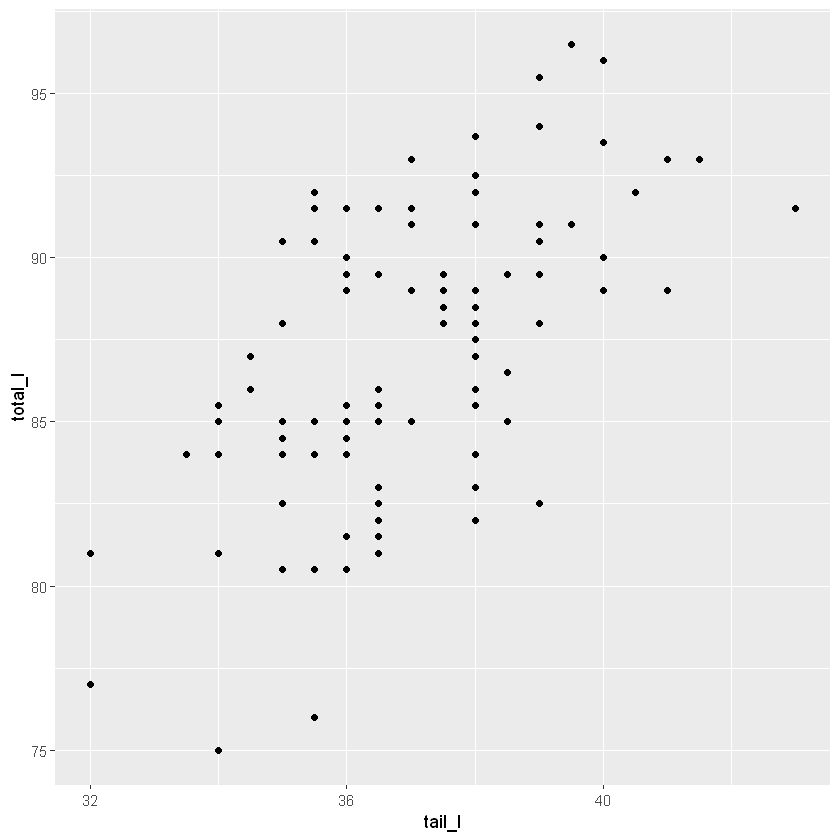

In [52]:
possum %>%
    ggplot(aes(y=total_l, x=tail_l)) +
    geom_point()

### Through the origin

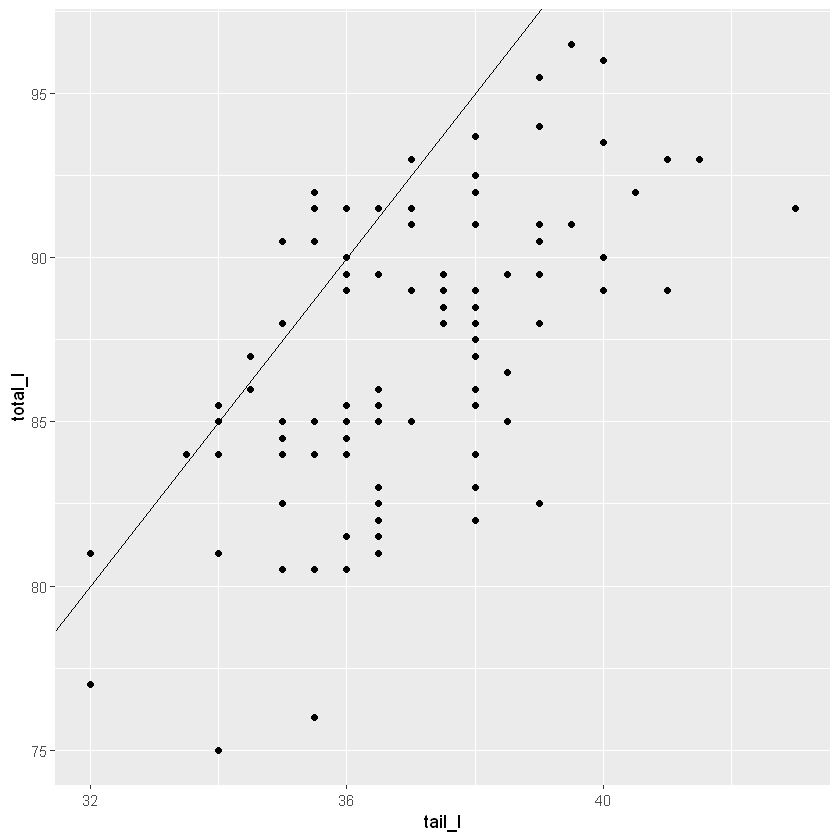

In [53]:
possum %>%
    ggplot(aes(y=total_l, x=tail_l)) +
    geom_point() +
    geom_abline(intercept=0, slope=2.5)

### Through the origin, better fit

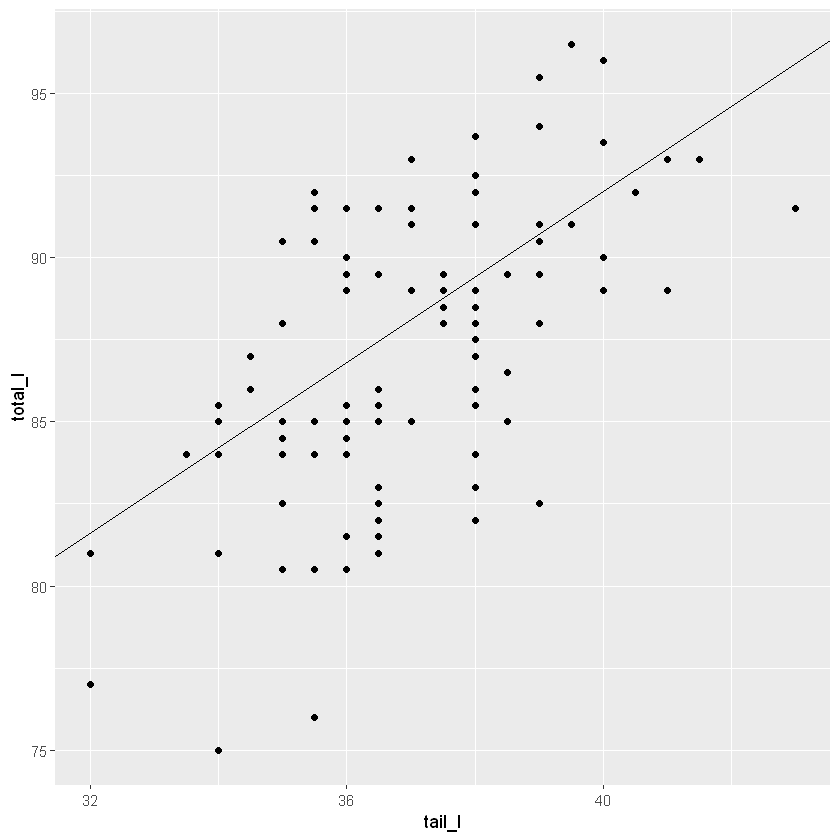

In [54]:
possum %>%
    ggplot(aes(y=total_l, x=tail_l)) +
    geom_point() +
    geom_abline(intercept=40, slope=1.3)

### The "best" fit line

The simple linear regression model for a numeric response as a function of a numeric explanatory variable can be visualized on the corresponding scatterplot by a straight line. This is a "best fit" line that cuts through the data in a way that minimizes the distance between the line and the data points.

We might consider linear regression to be a specific example of a larger class of smooth models. The `geom_smooth()` function allows us to draw such models over a scatterplot of the data itself. This technique is known as visualizing the model in the data space. The `method` argument to `geom_smooth()` allows one to specify what class of smooth model you want to see. Since we are exploring linear models, we'll set this argument to the value `"lm"`.

`geom_smooth()` using formula 'y ~ x'


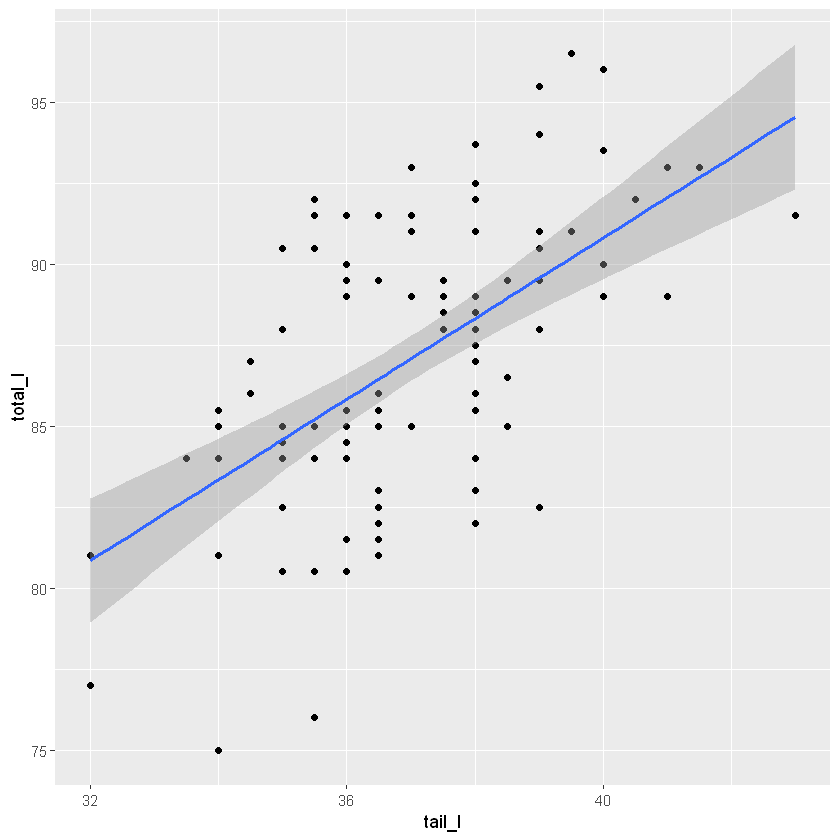

In [55]:
possum %>%
    ggplot(aes(y=total_l, x=tail_l)) +
    geom_point() +
    geom_smooth(method="lm")

### Ignore standard errors

`geom_smooth()` also takes an se argument that controls the standard error, which we will ignore for now.

`geom_smooth()` using formula 'y ~ x'


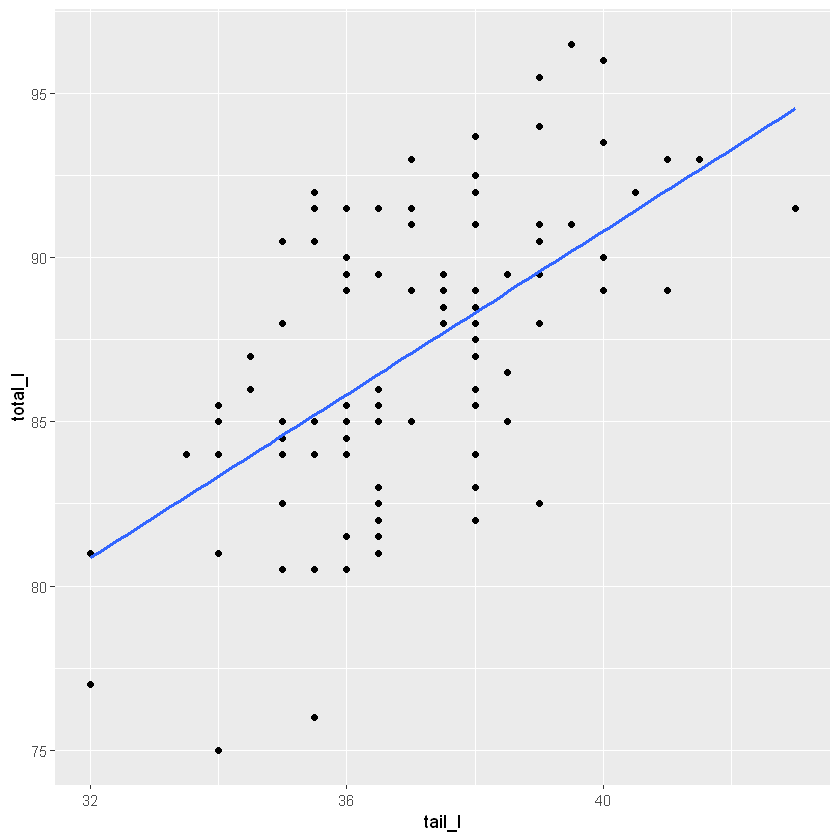

In [56]:
possum %>%
    ggplot(aes(y=total_l, x=tail_l)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

 a scatterplot of body weight as a function of height for all individuals in the `bdims` dataset with a simple linear model plotted over the data.

`geom_smooth()` using formula 'y ~ x'


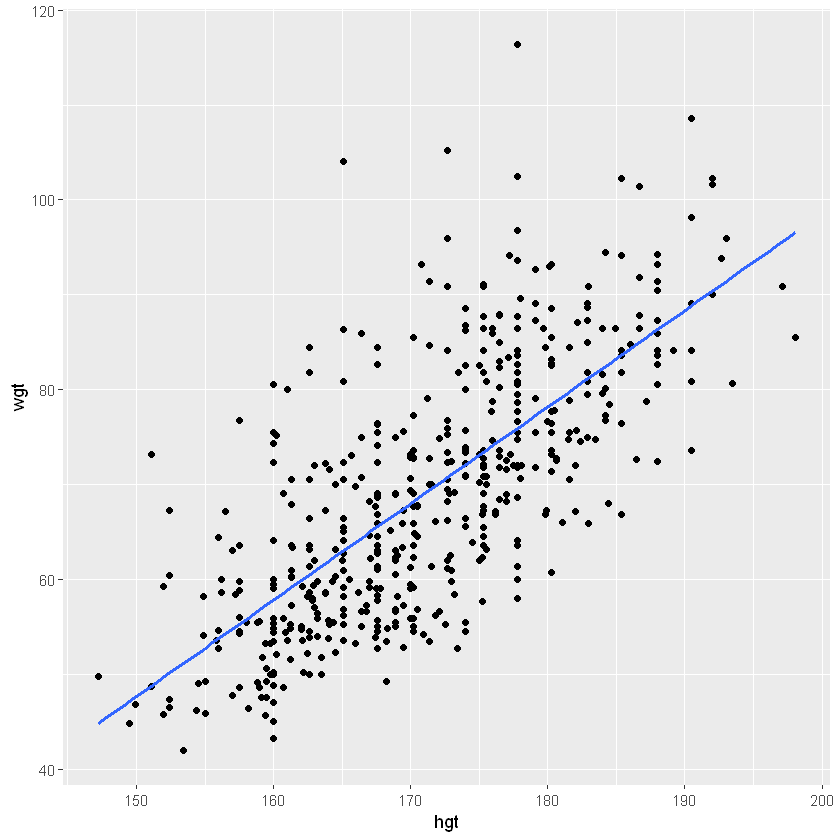

In [57]:
# Scatterplot with regression line
ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)

In [58]:
add_line <- function (my_slope) {
    bdims_summary <- bdims %>%
        summarize(N = n(), r = cor(hgt, wgt), 
                  mean_hgt = mean(hgt), 
                  mean_wgt = mean(wgt),
                  sd_hgt = sd(hgt), 
                  sd_wgt = sd(wgt)) %>%
            mutate(true_slope = r * sd_wgt / sd_hgt, 
                   true_intercept = mean_wgt - true_slope * mean_hgt)
    p <- ggplot(data = bdims, aes(x = hgt, y = wgt)) + 
        geom_point() + 
        geom_point(data = bdims_summary,
                   aes(x = mean_hgt, y = mean_wgt),
                   color = "red", size = 3)
    my_data <- bdims_summary %>%
        mutate(my_slope = my_slope,
               my_intercept = mean_wgt - my_slope * mean_hgt)
    p + geom_abline(data = my_data, 
                    aes(intercept = my_intercept, slope = my_slope), color = "dodgerblue")
}

### Uniqueness of least squares regression line

The least squares criterion implies that the slope of the regression line is unique. The slope is computed by R. We will experiment with trying to find the optimal value for the regression slope for weight as a function of height in the `bdims` dataset via trial-and-error.

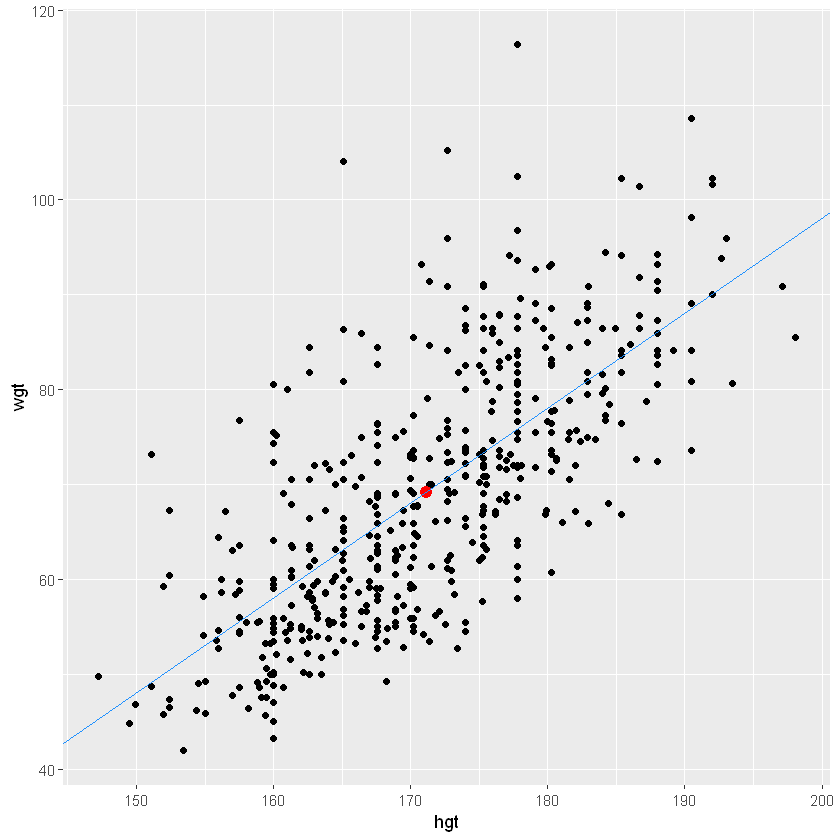

In [59]:
add_line(1)

## Understanding Linear Models

### Generic statistical model

$response = f(explanatory) + noise$

### Generic linear model

$response = intercept + (slope * explanatory) + noise$

### Regression model

$Y = \beta_{0} + \beta_{1}.X+\epsilon, \ \ \ \epsilon ~ N(0, \sigma_{\epsilon})$

### Fitted values

$\hat{Y} = \hat{\beta_0} + \hat{\beta_1} . X$

### Residuals

$e = Y -\hat{Y}$

### Fitting procedure

- Given $n$ observations of pairs $(x_i, y_i)$...
- Find $\hat{\beta_0}$, $\hat{\beta_1}$  that minimize $\sum_{i=1}^{n} {e_i}^2$

### Least squares

- Easy, deterministic,  unique solution
- Residuals sum to zero 
- Line must pass through ($\bar{x}$, $\bar{y}$)
- Other criteria exist

### Key concepts
- $\hat{Y}$ is expected value given corresponding $X$
- $\hat{\beta}$ are estimates of true, unknown betas $\beta$
- Residuals ($e$'s) are estimates of true, unknown epsilons $\epsilon$
- "Error" may be misleading term—better: noise


### Fitting a linear model "by hand"

the simple linear regression model:
$$
Y = b_0 + b_1.X
$$
Two facts enable us to compute the slope $b_1$ and intercept $b_0$ of a simple linear regression model from some basic summary statistics.

- First, the slope can be defined as:
$$
b_1 = r_{X, Y} . \frac{s_Y}{s_X}
$$
Where $r_{X, Y}$ is the correlation (`cor()`) of $X$ and $Y$ and $s_X$ and $s_Y$ represent the standard deviation (`sd()`) of $X$ and $Y$ respectively.
- Second, the point $(\bar{x}, \bar{y})$ is always on the least squares regression line, where $\bar{x}$ and $\bar{y}$ denote the average of $x$ and $y$ respectively.

In [60]:
(bdims_summary <- bdims %>%
        summarize(N = n(), r = cor(hgt, wgt), 
                  mean_hgt = mean(hgt), 
                  mean_wgt = mean(wgt),
                  sd_hgt = sd(hgt), 
                  sd_wgt = sd(wgt)) %>%
            mutate(true_slope = r * sd_wgt / sd_hgt, 
                   true_intercept = mean_wgt - true_slope * mean_hgt))

N,r,mean_hgt,mean_wgt,sd_hgt,sd_wgt,true_slope,true_intercept
507,0.7173011,171.1438,69.14753,9.407205,13.34576,1.017617,-105.0113


## Regression vs. regression to the mean

### Heredity
- Galton's "regression to the mean"
- **Thought experiment**: consider the heights of the children of NBAplayers

### Regression modeling
- **"Regression"**: techniques for modeling a quantitative response
- Types of regression models:
  - Least squares
  - Weighted
  - Generalized
  - Non parametric
  - Ridge
  - Bayesian. . .


### Regression to the mean

_Regression to the mean_ is a concept attributed to Sir Francis Galton. The basic idea is that extreme random observations will tend to be less extreme upon a second trial. This is simply due to chance alone. While "regression to the mean" and "linear regression" are not the same thing, we will examine them together in this exercise.

# Interpreting regression models

How to interpret the coefficients in a regression model.

## Interpretation of Regression

### Is that textbook overpriced?

In [81]:
head(textbooks)

dept_abbr,course,isbn,ucla_new,amaz_new,more,diff
Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
Anthro,9,978-0030119194,40.59,31.14,Y,9.45
Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
Art His,M102K,978-0892365999,18.95,14.21,Y,4.74
Art His,118E,978-0394723693,14.95,10.17,Y,4.78


### Compared to the course number?

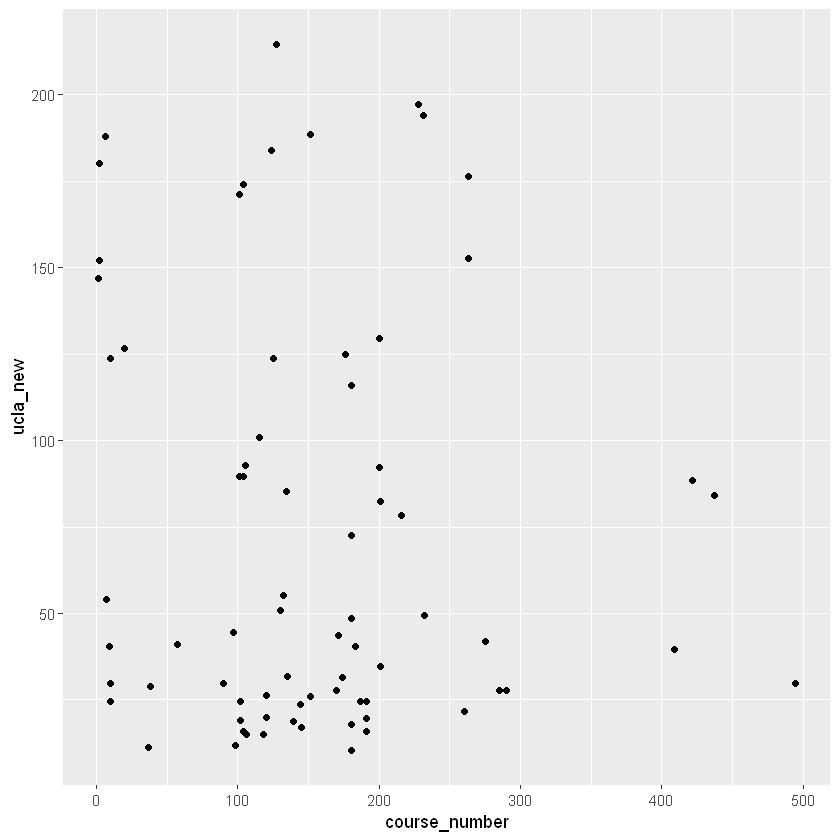

In [88]:
textbooks %>%
    mutate(course_number = as.integer(gsub("\\D", "", course))) %>%
        ggplot(aes(x=course_number, y=ucla_new)) +
        geom_point()

### Compared to Amazon?



In [89]:
names(textbooks)

[1] "dept_abbr" "course"    "isbn"      "ucla_new"  "amaz_new"  "more"     
[7] "diff"

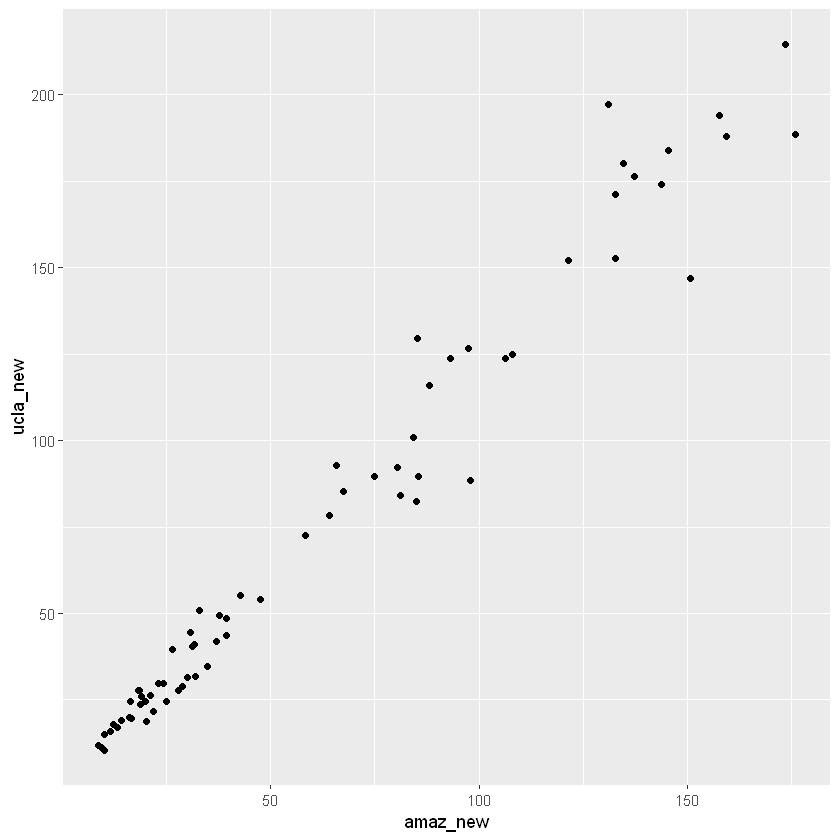

In [90]:
textbooks %>%
    ggplot(aes(x=amaz_new, y=ucla_new)) +
    geom_point()

`geom_smooth()` using formula 'y ~ x'


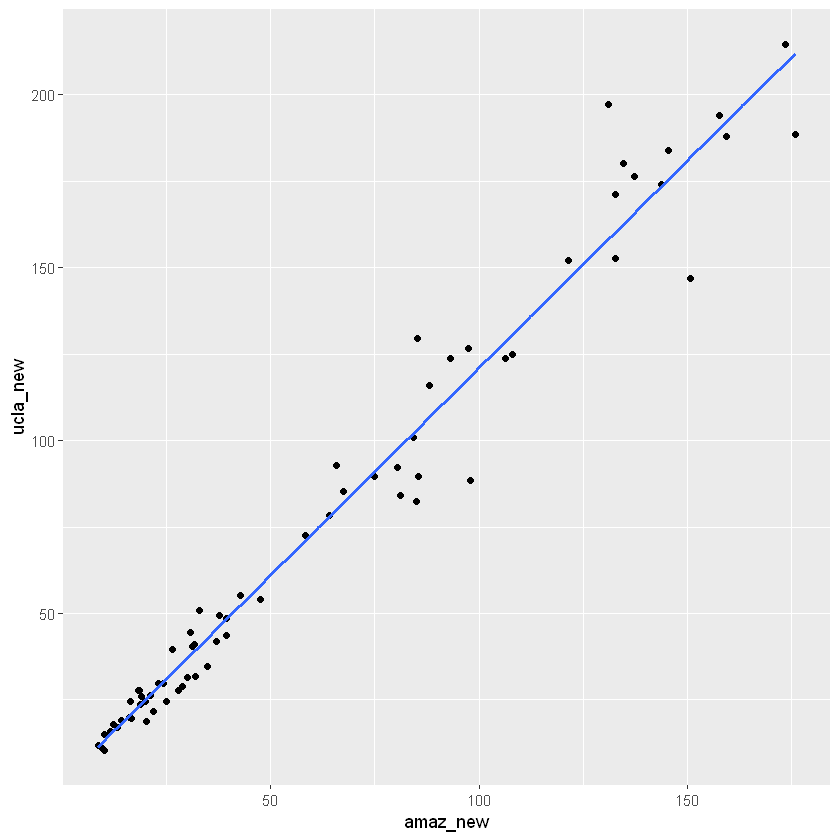

In [91]:
textbooks %>%
    ggplot(aes(x=amaz_new, y=ucla_new)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### Slope and intercept

In [92]:
lm(ucla_new ~ amaz_new, data=textbooks)


Call:
lm(formula = ucla_new ~ amaz_new, data = textbooks)

Coefficients:
(Intercept)     amaz_new  
      0.929        1.199  


$$\widehat{ucla\_new} = 0.929 + {amaz\_new}*1.119$$

### Units and scale

In [93]:
textbooks %>%
    mutate(amaz_new_cents = amaz_new *100) %>%
        lm(ucla_new ~ amaz_new_cents, data=.)


Call:
lm(formula = ucla_new ~ amaz_new_cents, data = .)

Coefficients:
   (Intercept)  amaz_new_cents  
       0.92897         0.01199  


### Fitting simple linear models

While the `geom_smooth(method = "lm")` function is useful for drawing linear models on a scatterplot, it doesn't actually return the characteristics of the model. As suggested by that syntax, however, the function that creates linear models is `lm()`. This function generally takes two arguments:

- A formula that specifies the model
- A data argument for the data frame that contains the data you want to use to fit the model

The `lm()` function return a model object having class "lm". This object contains lots of information about your regression model, including the data used to fit the model, the specification of the model, the fitted values and residuals, etc.

In [94]:
# Linear model for weight as a function of height
lm(wgt ~ hgt, data = bdims)




Call:
lm(formula = wgt ~ hgt, data = bdims)

Coefficients:
(Intercept)          hgt  
   -105.011        1.018  


A person who is 170 cm tall is expected to weigh about 68 kg.


In [95]:
# Linear model for SLG as a function of OBP
lm(slg ~ obp, data=mlbbat10)




Call:
lm(formula = slg ~ obp, data = mlbbat10)

Coefficients:
(Intercept)          obp  
   0.009407     1.110323  


In [98]:
# Log-linear model for body weight as a function of brain weight
lm(log(body) ~ log(brain), data=mammals)


Call:
lm(formula = log(body) ~ log(brain), data = mammals)

Coefficients:
(Intercept)   log(brain)  
     -2.509        1.225  


##  linear model object

An "lm" object contains a host of information about the regression model that we fit. There are various ways of extracting different pieces of information.

In [100]:
class(mod<- lm(ucla_new ~ amaz_new, data=textbooks))

[1] "lm"

In [101]:
mod


Call:
lm(formula = ucla_new ~ amaz_new, data = textbooks)

Coefficients:
(Intercept)     amaz_new  
      0.929        1.199  


### Fitted coefcients

The `coef()` function displays only the values of the coefficients.

In [102]:
coef(mod)

(Intercept)    amaz_new 
  0.9289651   1.1990014

### Summary

The `summary()` function displays not only that information, but a bunch of other information, including the associated standard error and p-value for each coefficient, the $R^2$, adjusted $R^2$, and the residual standard error. The summary of an "lm" object in R is very similar to the output you would see in other statistical computing environments (e.g. Stata, SPSS, etc.)

In [103]:
summary(mod)


Call:
lm(formula = ucla_new ~ amaz_new, data = textbooks)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.785  -4.574   0.577   4.012  39.002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92897    1.93538    0.48    0.633    
amaz_new     1.19900    0.02519   47.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.47 on 71 degrees of freedom
Multiple R-squared:  0.9696,	Adjusted R-squared:  0.9692 
F-statistic:  2266 on 1 and 71 DF,  p-value: < 2.2e-16


### Fitted values

Once you have fit a regression model, you are often interested in the fitted values ($\hat{y}_i$) and the residuals ($e_i$) where $i$ indexes the observations. 
$$
e_i = y_i - \hat{y}_i
$$

The least squares fitting procedure guarantees that the mean of the residuals is zero (n.b., numerical instability may result in the computed values not being exactly zero). At the same time, the mean of the fitted values must equal the mean of the response variable.

we will confirm these two mathematical facts by accessing the fitted values and residuals with the `fitted.values()` and `residuals()` functions, respectively

In [107]:
head(fitted.values(mod), 10)

1         2         3         4         5         6         7         8 
 34.44105  38.26587  39.29701  14.74146  17.96678  13.12281  24.98093  20.90433 
        9        10 
128.32287  16.82772

In [112]:
# Mean of weights equal to mean of fitted values?
head(mean(bdims$wgt) == fitted.values(mod), 10)

1     2     3     4     5     6     7     8     9    10 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

### Residuals

In [106]:
head(residuals(mod), 10)

1          2          3          4          5          6          7 
-6.7710547  2.3241308 -7.6170104  1.2585386  0.9832248  1.8271905 -0.2809335 
         8          9         10 
-1.4043287 -4.4828656  0.1722761

In [113]:
# Mean of the residuals
mean(residuals(mod))

[1] 3.40885e-17

### Broom

As we fit a regression model, there are some quantities (e.g. $R^2$) that apply to the model as a whole, while others apply to each observation (e.g. $\hat{y}_i$. If there are several of these per-observation quantities, it is sometimes convenient to attach them to the original data as new variables.

The `augment()` function from the `broom` package does exactly this. It takes a model object as an argument and returns a data frame that contains the data on which the model was fit, along with several quantities specific to the regression model, including the fitted values, residuals, leverage scores, and standardized residuals.

In [115]:
head(bdims_tidy <- augment(mod), 10)

ucla_new,amaz_new,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
27.67,27.95,34.44105,1.460257,-6.7710547,0.01944321,10.51520,4.226829e-03,-0.65294223
40.59,31.14,38.26587,1.418184,2.3241308,0.01833896,10.54319,4.686540e-04,0.22399308
31.68,32.00,39.29701,1.407411,-7.6170104,0.01806141,10.50682,4.954865e-03,-0.73400193
16.00,11.52,14.74146,1.720649,1.2585386,0.02699567,10.54581,2.059099e-04,0.12183273
18.95,14.21,17.96678,1.673789,0.9832248,0.02554530,10.54624,1.185695e-04,0.09511014
14.95,10.17,13.12281,1.744683,1.8271905,0.02775510,10.54459,4.469293e-04,0.17695010
24.70,20.06,24.98093,1.577134,-0.2809335,0.02268020,10.54686,8.543980e-06,-0.02713564
19.50,16.66,20.90433,1.632387,-1.4043287,0.02429719,10.54554,2.294765e-04,-0.13575780
123.84,106.25,128.32287,1.700434,-4.4828656,0.02636508,10.53292,2.548167e-03,-0.43382289
17.00,13.26,16.82772,1.690176,0.1722761,0.02604795,10.54689,3.715594e-06,0.01666906


In [116]:
glimpse(bdims_tidy)

Rows: 73
Columns: 9
$ ucla_new   <dbl> 27.67, 40.59, 31.68, 16.00, 18.95, 14.95, 24.70, 19.50, ...
$ amaz_new   <dbl> 27.95, 31.14, 32.00, 11.52, 14.21, 10.17, 20.06, 16.66, ...
$ .fitted    <dbl> 34.44105, 38.26587, 39.29701, 14.74146, 17.96678, 13.122...
$ .se.fit    <dbl> 1.460257, 1.418184, 1.407411, 1.720649, 1.673789, 1.7446...
$ .resid     <dbl> -6.7710547, 2.3241308, -7.6170104, 1.2585386, 0.9832248,...
$ .hat       <dbl> 0.01944321, 0.01833896, 0.01806141, 0.02699567, 0.025545...
$ .sigma     <dbl> 10.51520, 10.54319, 10.50682, 10.54581, 10.54624, 10.544...
$ .cooksd    <dbl> 4.226829e-03, 4.686540e-04, 4.954865e-03, 2.059099e-04, ...
$ .std.resid <dbl> -0.65294223, 0.22399308, -0.73400193, 0.12183273, 0.0951...


## Using linear model


### Examining residuals

In [117]:
bdims_tidy %>%
    arrange(desc(.resid)) %>%
        head(10)

ucla_new,amaz_new,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
197.00,131.00,157.99815,2.179394,39.001849,0.04330931,9.408665,0.328161952,3.8076256
129.60,85.20,103.08389,1.386624,26.516114,0.01753183,10.050561,0.058222349,2.5544973
180.03,134.69,162.42247,2.256857,17.607534,0.04644271,10.324375,0.072193934,1.7217891
92.88,65.73,79.73933,1.235832,13.140672,0.01392606,10.427641,0.011275197,1.2636234
123.84,93.13,112.59197,1.490523,11.248033,0.02025756,10.459091,0.012172957,1.0851142
171.00,132.77,160.12038,2.216402,10.879617,0.04479266,10.462654,0.026492224,1.0629665
176.25,137.17,165.39599,2.309560,10.854011,0.04863716,10.462711,0.028862633,1.0626053
50.95,32.97,40.46004,1.395565,10.489958,0.01775864,10.470767,0.009234223,1.0106935
116.00,88.09,106.54900,1.422121,9.451000,0.01844092,10.485102,0.007794440,0.9109077
126.67,97.38,117.68772,1.553935,8.982277,0.02201788,10.490892,0.008467715,0.8673129


### Markup

In [118]:
textbooks %>%
    filter(ucla_new == 197)

dept_abbr,course,isbn,ucla_new,amaz_new,more,diff
Mgmt,228,978-0073379661,197,131,Y,66


### Making predictions

The `fitted.values()` function or the `augment()`-ed data frame provides us with the fitted values for the observations that were in the original data. However, once we have fit the model, we may want to compute expected values for observations that were **not** present in the data on which the model was fit. These types of predictions are called out-of-sample.

In [120]:
predict(mod, new_data <- data.frame(amaz_new=8.49))

1 
11.10849

### Visualize new observations

The `geom_smooth()` function makes it easy to add a simple linear regression line to a scatterplot of the corresponding variables. And in fact, there are more complicated regression models that can be visualized in the data space with `geom_smooth()`. However, there may still be times when we will want to add regression lines to our scatterplot manually. To do this, we can use the `geom_abline()` function, which takes slope and intercept arguments. Naturally, we have to compute those values ahead of time, but we already saw how to do this (e.g. using `coef()`).

`geom_smooth()` using formula 'y ~ x'


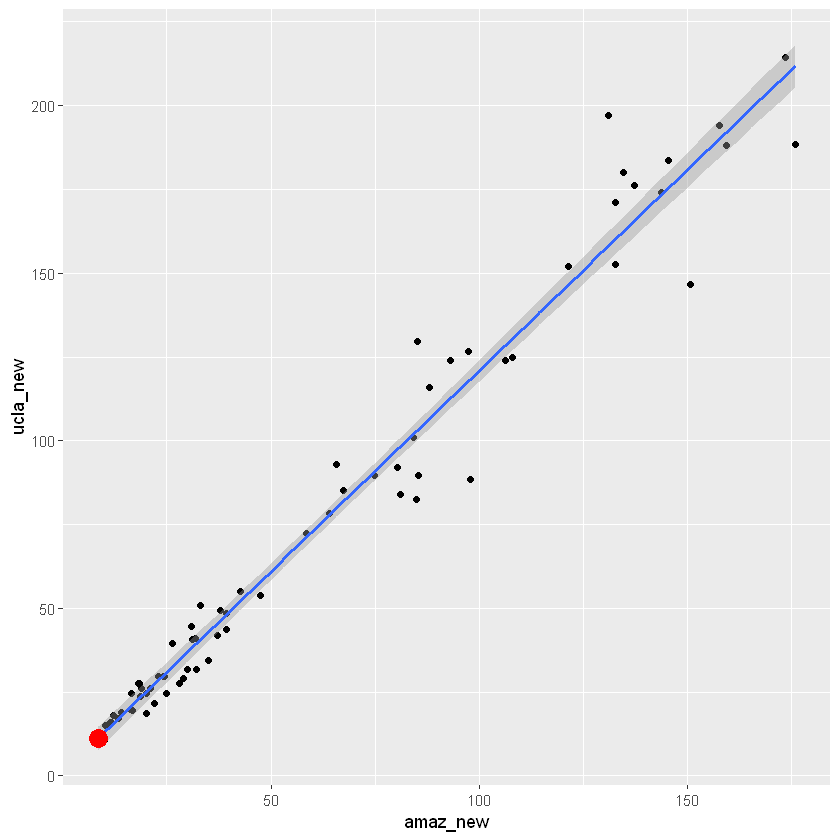

In [125]:
isrs <- augment(mod, newdata=new_data)
textbooks %>%
    ggplot(aes(x=amaz_new, y=ucla_new)) +
    geom_point() +
    geom_smooth(method="lm") +
    geom_point(data=isrs,aes(y=.fitted), size=5, color="red")

# Model Fit

How to assess the "fit" of a simple linear regression model.

## Assessing Model Fit


### How well does our textbook model t?

`geom_smooth()` using formula 'y ~ x'


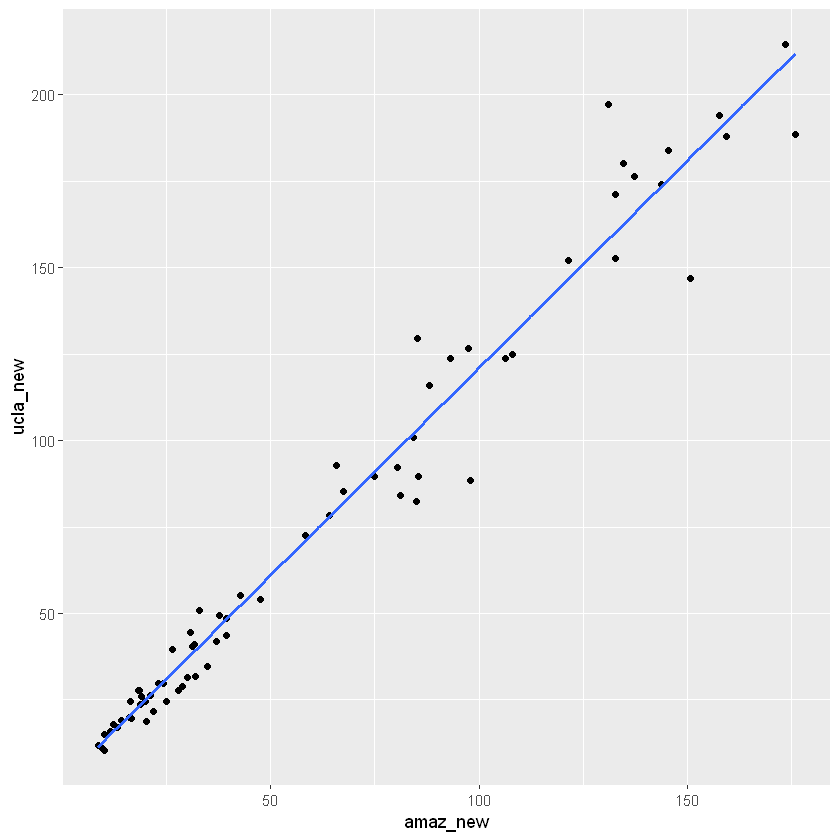

In [127]:
textbooks %>%
    ggplot(aes(x=amaz_new, y=ucla_new)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### How well does our possum model t?

`geom_smooth()` using formula 'y ~ x'


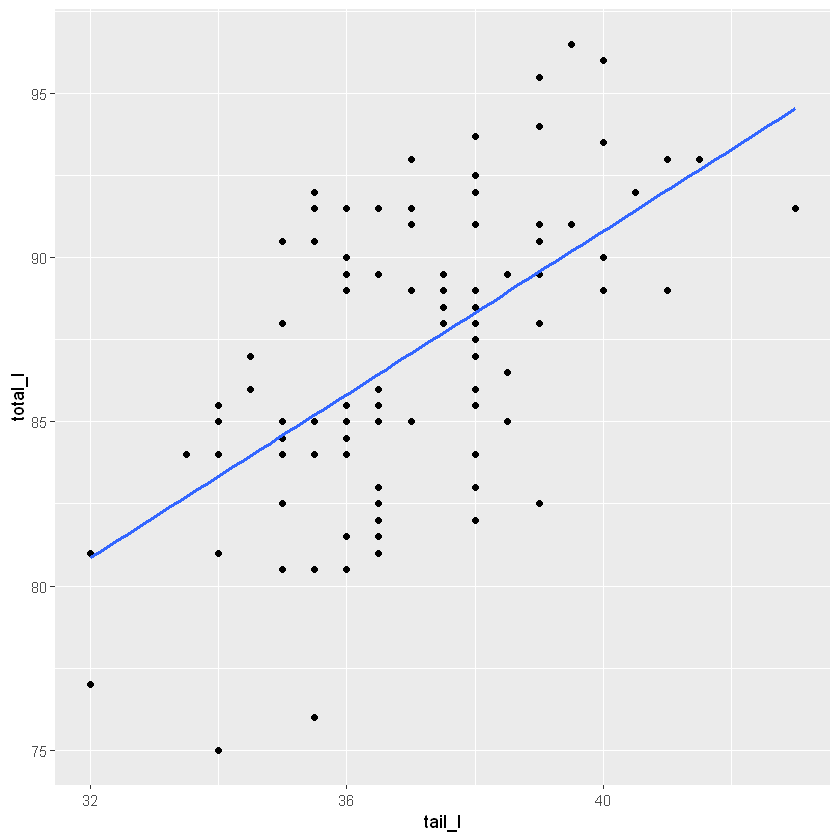

In [129]:
possum %>%
    ggplot(aes(x=tail_l, y=total_l)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### SSE

One way to assess strength of fit is to consider how far off the model is for a typical case. That is, for some observations, the fitted value will be very close to the actual value, while for others it will not. The magnitude of a typical residual can give us a sense of generally how close our estimates are.

In [130]:
(mod_possum <- lm(total_l ~ tail_l, data=possum)) %>%
    augment() %>%
        summarise(SSE=sum(.resid^2), SSE_also=(n()-1)*var(.resid))

SSE,SSE_also
1301.488,1301.488


### RMSE
some of the residuals are positive, while others are negative. In fact, it is guaranteed by the least squares fitting procedure that the mean of the residuals is zero. Thus, it makes more sense to compute the square root of the mean squared residual, or _root mean squared error_ $RMSE$. R calls this quantity the _residual standard error_.

To make this estimate unbiased, you have to divide the sum of the squared residuals by the degrees of freedom in the model. Thus,
$$
RMSE = \sqrt{\frac{\sum_ie_i^2}{d.f}} = \sqrt{\frac{SSE}{n-2}}
$$

You can recover the residuals from `mod` with `residuals()`, and the degrees of freedom with `df.residual()`.

### Residual standard error (possums)

In [132]:
summary(mod_possum)


Call:
lm(formula = total_l ~ tail_l, data = possum)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2100 -2.3265  0.1792  2.7765  6.7900 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.0371     6.6568   6.165 1.43e-08 ***
tail_l        1.2443     0.1796   6.927 3.94e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.572 on 102 degrees of freedom
Multiple R-squared:   0.32,	Adjusted R-squared:  0.3133 
F-statistic: 47.99 on 1 and 102 DF,  p-value: 3.935e-10


### Residual standard error (textbooks)

In [133]:
summary(mod)


Call:
lm(formula = ucla_new ~ amaz_new, data = textbooks)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.785  -4.574   0.577   4.012  39.002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92897    1.93538    0.48    0.633    
amaz_new     1.19900    0.02519   47.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.47 on 71 degrees of freedom
Multiple R-squared:  0.9696,	Adjusted R-squared:  0.9692 
F-statistic:  2266 on 1 and 71 DF,  p-value: < 2.2e-16


In [135]:
# Compute the mean of the residuals
mean(residuals(mod))

[1] 3.40885e-17

In [136]:
# Compute RMSE
sqrt(sum(residuals(mod)^2) / df.residual(mod))

[1] 10.47237

## Comparing model fits


### Null (average) model
- For all observations...
$\hat{y} = \bar{y}$

### SSE, null model

In [140]:
(mod_null <- lm(total_l~1, data=possum) %>%
    augment(possum) %>%
        summarise(SST=sum(.resid^2)))

SST
1913.826


### SSE, our model

In [142]:
augment(mod_possum) %>%
    summarise(SSE = sum(.resid^2))

SSE
1301.488


### Coefcient of determination

$$
R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{var(e)}{var(y)}
$$

$e$ is the vector of residuals and $y$ is the response variable. This gives us the interpretation of $R^2$ as the percentage of the variability in the response that is explained by the model, since the residuals are the part of that variability that remains unexplained by the model.

### Connection to correlation
- For simple linear regression..
$$
r_{x,y}^2 = R^2
$$

In [143]:
summary(mod_possum)


Call:
lm(formula = total_l ~ tail_l, data = possum)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2100 -2.3265  0.1792  2.7765  6.7900 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.0371     6.6568   6.165 1.43e-08 ***
tail_l        1.2443     0.1796   6.927 3.94e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.572 on 102 degrees of freedom
Multiple R-squared:   0.32,	Adjusted R-squared:  0.3133 
F-statistic: 47.99 on 1 and 102 DF,  p-value: 3.935e-10


### Over-reliance on R-squared

> twitter: https://twitter.com/VictorOmondi197/status/1285197027429756928

### Assessing simple linear model fit

In [144]:
summary(mod_bdims <- lm(wgt ~ hgt, data=bdims))


Call:
lm(formula = wgt ~ hgt, data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.743  -6.402  -1.231   5.059  41.103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.01125    7.53941  -13.93   <2e-16 ***
hgt            1.01762    0.04399   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.308 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


In [148]:
# Compute R-squared
bdims_tidy <- augment(mod_bdims)
bdims_tidy %>%
  summarize(var_y = var(wgt), var_e = var(.resid)) %>%
  mutate(R_squared = 1 - (var_e/var_y))

var_y,var_e,R_squared
178.1094,86.46839,0.5145208


This means that 51.4% of the variability in weight is explained by height.

### Linear vs. average

The $R^2$ gives us a numerical measurement of the strength of fit relative to a null model based on the average of the response variable:
$$
\hat{y}_{null} = \bar{y}
$$

This model has an $R^2$ of zero because $SSE = SST$. That is, since the fitted values ($\hat{y}_{null}$) are all equal to the average ($\bar{y}$) the residual for each observation is the distance between that observation and the mean of the response. Since we can always fit the null model, it serves as a baseline against which all other models will be compared.

## Unusual Points


`geom_smooth()` using formula 'y ~ x'


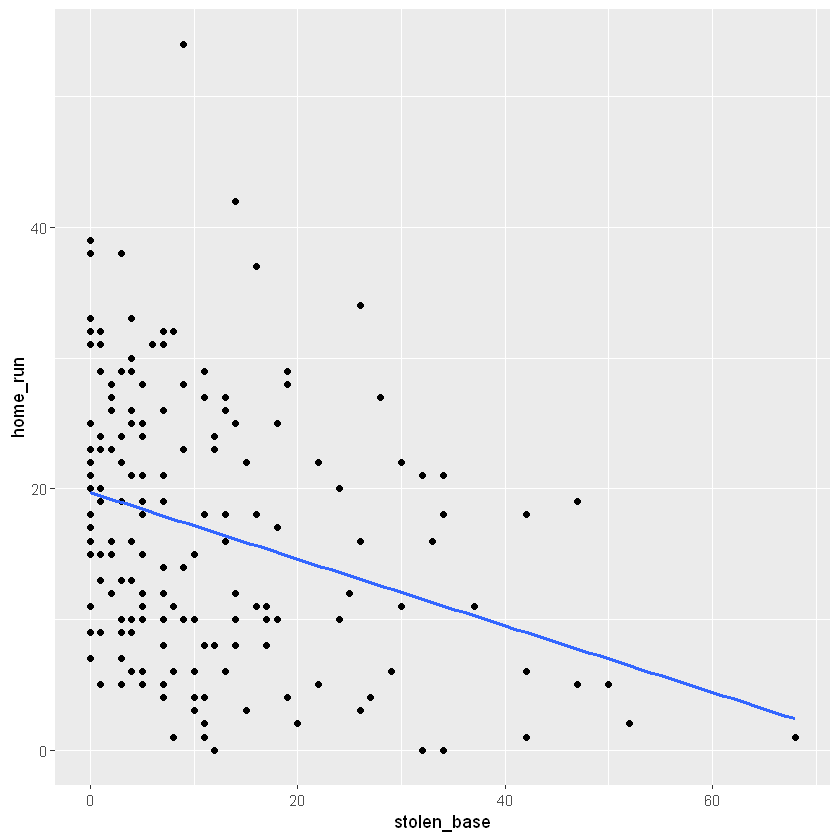

In [151]:
(regulars <- mlbbat10 %>%
    filter(at_bat > 400)
) %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### Leverage

The leverage of an observation in a regression model is defined entirely in terms of the distance of that observation from the mean of the explanatory variable. That is, observations close to the mean of the explanatory variable have low leverage, while observations far from the mean of the explanatory variable have high leverage. Points of high leverage may or may not be influential.

$$
h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

In [162]:
mod_regs <- lm(home_run ~ stolen_base, data=regulars) 
mod_regs %>%
    augment() %>%
        arrange(desc(.hat)) %>%
            dplyr::select(home_run, stolen_base, .fitted, .resid, .hat) %>%
            head()

home_run,stolen_base,.fitted,.resid,.hat
1,68,2.382748,-1.382748,0.13081869
2,52,6.461361,-4.461361,0.07033516
5,50,6.971187,-1.971187,0.06416940
19,47,7.735927,11.264073,0.05550188
5,47,7.735927,-2.735927,0.05550188
1,42,9.010493,-8.010493,0.04260564


### Influence via Cook's distance

As noted previously, observations of high leverage may or may not be influential. The influence of an observation depends not only on its leverage, but also on the magnitude of its residual.while leverage only takes into account the explanatory variable ($x$) , the residual depends on the response variable ($y$) and the fitted value ($\hat{y}$)

Influential points are likely to have high leverage and deviate from the general relationship between the two variables. We measure influence using Cook's distance, which incorporates both the leverage and residual of each observation.

In [163]:
mod_regs <- lm(home_run ~ stolen_base, data=regulars) 
mod_regs %>%
    augment() %>%
        arrange(desc(.cooksd)) %>%
            dplyr::select(home_run, stolen_base, .fitted, .resid, .hat, .cooksd) %>%
            head()

home_run,stolen_base,.fitted,.resid,.hat,.cooksd
54,9,17.422632,36.577368,0.006071871,0.04338485
19,47,7.735927,11.264073,0.055501875,0.04164828
34,26,13.089106,20.910894,0.014354719,0.03408782
42,14,16.148065,25.851935,0.006183536,0.02207554
39,0,19.716851,19.283149,0.010752252,0.02155489
18,42,9.010493,8.989507,0.042605645,0.01981791


## Dealing with Outliers

Observations can be outliers for a number of different reasons. Statisticians must always be careful—and more importantly, transparent—when dealing with outliers. Sometimes, a better model fit can be achieved by simply removing outliers and re-fitting the model. However, one must have strong justification for doing this. A desire to have a higher $R^2$ is not a good enough reason!

In the mlbBat10 data, the outlier with an OBP of 0.550 is Bobby Scales, an infielder who had four hits in 13 at-bats for the Chicago Cubs. Scales also walked seven times, resulting in his unusually high OBP. The justification for removing Scales here is weak. While his performance was unusual, there is nothing to suggest that it is not a valid data point, nor is there a good reason to think that somehow we will learn more about Major League Baseball players by excluding him.

Nevertheless, we can demonstrate how removing him will affect our model.

### Removing outliers

In [166]:
# Create nontrivial_players
nontrivial_players <- mlbbat10 %>%
  filter(at_bat >= 10, obp<.5)


# Fit model to new data
mod_cleaner = lm(slg ~ obp, data=nontrivial_players)

# View model summary
summary(mod_cleaner)




Call:
lm(formula = slg ~ obp, data = nontrivial_players)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31383 -0.04165 -0.00261  0.03992  0.35819 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.043326   0.009823  -4.411 1.18e-05 ***
obp          1.345816   0.033012  40.768  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07011 on 734 degrees of freedom
Multiple R-squared:  0.6937,	Adjusted R-squared:  0.6932 
F-statistic:  1662 on 1 and 734 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'


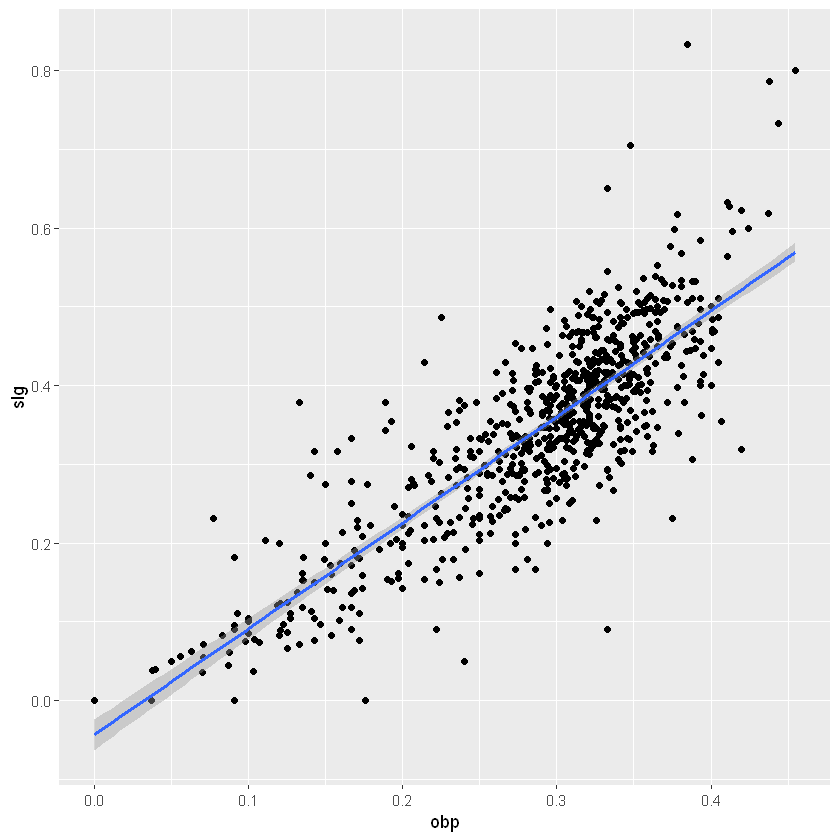

In [167]:
# Visualize new model
nontrivial_players %>%
  ggplot(aes(x=obp, y=slg))+
    geom_point() +
      geom_smooth(method="lm")

### High leverage points

Not all points of high leverage are influential. While the high leverage observation corresponding to Bobby Scales is influential, the three observations for players with OBP and SLG values of 0 are not influential.

This is because they happen to lie right near the regression anyway. Thus, while their extremely low OBP gives them the power to exert influence over the slope of the regression line, their low SLG prevents them from using it.

In [168]:
# Rank high leverage points
mod_cleaner %>%
  augment() %>%
    arrange(desc(.hat)) %>%
      head()

slg,obp,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
0.000,0.000,-0.043326156,0.009822766,0.043326156,0.01962741,0.07014279,3.898939e-03,0.62409729
0.000,0.000,-0.043326156,0.009822766,0.043326156,0.01962741,0.07014279,3.898939e-03,0.62409729
0.000,0.000,-0.043326156,0.009822766,0.043326156,0.01962741,0.07014279,3.898939e-03,0.62409729
0.000,0.037,0.006469037,0.008650335,-0.006469037,0.01522163,0.07016100,6.680808e-05,-0.09297542
0.038,0.038,0.007814853,0.008618836,0.030185147,0.01511098,0.07015242,1.443677e-03,0.43380780
0.040,0.040,0.010506485,0.008555874,0.029493515,0.01489101,0.07015283,1.357607e-03,0.42382064
